# 1 Combine datasets so EDA can be performed on final dataset

## 1.1 Import libraries

In [1]:
import pandas as pd

## 1.2 Read all relevant data

In [2]:
# Read all data
print('-----Initial dataframes----')
articles = pd.read_csv('/Users/admin/Desktop/Y4S2/BT4211/Project/articles.csv')
print('Articles Dataframe shape:',articles.shape)
print('Articles Columns:',list(articles.columns))

customers = pd.read_csv('/Users/admin/Desktop/Y4S2/BT4211/Project/customers.csv')
print('\nCustomers Dataframe shape:',customers.shape)
print('Customers Columns:',list(customers.columns))

transactions = pd.read_csv('/Users/admin/Desktop/Y4S2/BT4211/Project/transactions_train.csv')
print('\nTransactions Dataframe shape:',transactions.shape)
print('Transactions Columns:',list(transactions.columns))

-----Initial dataframes----
Articles Dataframe shape: (105542, 25)
Articles Columns: ['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']

Customers Dataframe shape: (1371980, 7)
Customers Columns: ['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']

Transactions Dataframe shape: (31788324, 5)
Transactions Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


In [3]:
# Subset relevant columns
print('-----Filtered dataframes----')

articles_cols = ['article_id', 'prod_name', 'product_type_name', 'product_group_name', \
                 'graphical_appearance_name', 'colour_group_name', \
                 'perceived_colour_value_name', 'perceived_colour_master_name', \
                 'department_name', 'index_name', 'index_group_name', 'section_name', \
                 'garment_group_name', 'detail_desc']
articles = articles.loc[:,articles_cols]

customers_cols = ['customer_id', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']
customers = customers.loc[:,customers_cols]

print('Articles Dataframe shape:',articles.shape)
print('Articles Columns:',list(articles.columns))

print('\nCustomers Dataframe shape:',customers.shape)
print('Customers Columns:',list(customers.columns))

print('\nTransactions Dataframe shape:',transactions.shape)
print('Transactions Columns:',list(transactions.columns))

-----Filtered dataframes----
Articles Dataframe shape: (105542, 14)
Articles Columns: ['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc']

Customers Dataframe shape: (1371980, 6)
Customers Columns: ['customer_id', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']

Transactions Dataframe shape: (31788324, 5)
Transactions Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


## 1.3 Combine tables by performing Join

### 1.3.1 Join articles & transactions on article_id

In [4]:
df = pd.merge(transactions, articles, on=['article_id'])
print('Dataframe shape:',df.shape)
print('Columns:',list(df.columns))
df.head(2)

Dataframe shape: (31788324, 18)
Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc']


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [5]:
# Check articles
articles[articles['article_id']==663713001]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
40179,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [6]:
# Check transactions
transactions[transactions['article_id']==663713001].head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
10026,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2
14906,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2
20662,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1
26426,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2


In [7]:
# Check combined_df of articles & transformations
df[df['article_id']==663713001].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


### 1.3.2 Join customers & edited transactions on customer_id

In [8]:
df_final = pd.merge(df, customers, on=['customer_id'])
print('Dataframe shape:',df_final.shape)
print('Columns:',list(df_final.columns))
df_final.head(2)

Dataframe shape: (31788324, 23)
Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,index_name,index_group_name,section_name,garment_group_name,detail_desc,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [9]:
df_final.loc[0,'customer_id']

'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'

In [10]:
# Check customers
customers[customers['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [11]:
# Check combined df of articles and transformations
df[df['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
26,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
633,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,Dusty Light,Pink,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
1963854,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,Light,Blue,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...
2939706,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,Dark,Black,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m..."


In [12]:
# Check final combined df of customers and edited transformations
df_final[df_final['customer_id']=='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'].head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,index_name,index_group_name,section_name,garment_group_name,detail_desc,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,...,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,...,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


### 1.3.3 Export joined tables into CSV

In [13]:
print('-----Exporting final dataframe-----')
print('Final Dataframe shape:',df_final.shape)
print('Final Columns:',list(df_final.columns))

-----Exporting final dataframe-----
Final Dataframe shape: (31788324, 23)
Final Columns: ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


In [14]:
df_final.to_csv('final_df.csv',index=False)
print('Final combined dataframe exported successfully!')

Final combined dataframe exported successfully!


# 2 Exploratory Data Analysis on H&M Data

## 2.1 Import libraries and read data

In [15]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv('final_df.csv')
print('Shape:',df.shape)
print('Columns:',df.columns)
df.head()

Shape: (31788324, 23)
Columns: Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,index_name,index_group_name,section_name,garment_group_name,detail_desc,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,...,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,...,Ladieswear,Ladieswear,Womens Casual,Blouses,Off-the-shoulder top in a cotton weave with el...,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,...,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Fully lined bikini bottoms with a mid waist, m...",NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


## 2.2 Preliminary data checks & Basic statistical analysis

In [17]:
# Check null values
for col in df.columns:
    print("Number of Null Values in", col, ": ", len(df[df[col].isna()]), "/", len(df))

Number of Null Values in t_dat :  0 / 31788324
Number of Null Values in customer_id :  0 / 31788324
Number of Null Values in article_id :  0 / 31788324
Number of Null Values in price :  0 / 31788324
Number of Null Values in sales_channel_id :  0 / 31788324
Number of Null Values in prod_name :  0 / 31788324
Number of Null Values in product_type_name :  0 / 31788324
Number of Null Values in product_group_name :  0 / 31788324
Number of Null Values in graphical_appearance_name :  0 / 31788324
Number of Null Values in colour_group_name :  0 / 31788324
Number of Null Values in perceived_colour_value_name :  0 / 31788324
Number of Null Values in perceived_colour_master_name :  0 / 31788324
Number of Null Values in department_name :  0 / 31788324
Number of Null Values in index_name :  0 / 31788324
Number of Null Values in index_group_name :  0 / 31788324
Number of Null Values in section_name :  0 / 31788324
Number of Null Values in garment_group_name :  0 / 31788324
Number of Null Values in de

In [18]:
# Replace na values
df['detail_desc'] = df['detail_desc'].fillna('')
df['Active'] = df['Active'].fillna(0)
df['club_member_status'] = df['club_member_status'].fillna('NONE')
df['fashion_news_frequency'] = df['fashion_news_frequency'].fillna('None')
df['fashion_news_frequency'] = df['fashion_news_frequency'].replace(['NONE'],'None')
df['detail_desc'] = df['detail_desc'].fillna('')
df = df.dropna(subset=['age'])

# Check null values
for col in df.columns:
    print("Number of Null Values in", col, ": ", len(df[df[col].isna()]), "/", len(df))

Number of Null Values in t_dat :  0 / 31648066
Number of Null Values in customer_id :  0 / 31648066
Number of Null Values in article_id :  0 / 31648066
Number of Null Values in price :  0 / 31648066
Number of Null Values in sales_channel_id :  0 / 31648066
Number of Null Values in prod_name :  0 / 31648066
Number of Null Values in product_type_name :  0 / 31648066
Number of Null Values in product_group_name :  0 / 31648066
Number of Null Values in graphical_appearance_name :  0 / 31648066
Number of Null Values in colour_group_name :  0 / 31648066
Number of Null Values in perceived_colour_value_name :  0 / 31648066
Number of Null Values in perceived_colour_master_name :  0 / 31648066
Number of Null Values in department_name :  0 / 31648066
Number of Null Values in index_name :  0 / 31648066
Number of Null Values in index_group_name :  0 / 31648066
Number of Null Values in section_name :  0 / 31648066
Number of Null Values in garment_group_name :  0 / 31648066
Number of Null Values in de

In [19]:
# Check data types
df.dtypes

t_dat                            object
customer_id                      object
article_id                        int64
price                           float64
sales_channel_id                  int64
prod_name                        object
product_type_name                object
product_group_name               object
graphical_appearance_name        object
colour_group_name                object
perceived_colour_value_name      object
perceived_colour_master_name     object
department_name                  object
index_name                       object
index_group_name                 object
section_name                     object
garment_group_name               object
detail_desc                      object
Active                          float64
club_member_status               object
fashion_news_frequency           object
age                             float64
postal_code                      object
dtype: object

In [20]:
# Convert datatypes to suitable datatypes
df = df.astype({'t_dat':'datetime64[ns]',
                'customer_id':'str',
                'article_id':'str',
                'price':'float',
                'sales_channel_id':'str',
                'prod_name':'category',
                'product_type_name':'category',
                'product_group_name':'category',
                'graphical_appearance_name':'category',
                'colour_group_name':'category',
                'perceived_colour_value_name':'category',
                'perceived_colour_master_name':'category',
                'department_name':'category',
                'index_name':'category',
                'index_group_name':'category',
                'section_name':'category',
                'garment_group_name':'category',
                'detail_desc':'str',
                'Active':'category',
                'club_member_status':'category',
                'fashion_news_frequency':'category',
                'age':'int64',
                'postal_code':'category'})
df.dtypes

t_dat                           datetime64[ns]
customer_id                             object
article_id                              object
price                                  float64
sales_channel_id                        object
prod_name                             category
product_type_name                     category
product_group_name                    category
graphical_appearance_name             category
colour_group_name                     category
perceived_colour_value_name           category
perceived_colour_master_name          category
department_name                       category
index_name                            category
index_group_name                      category
section_name                          category
garment_group_name                    category
detail_desc                             object
Active                                category
club_member_status                    category
fashion_news_frequency                category
age          

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31648066 entries, 0 to 31788323
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    object        
 3   price                         float64       
 4   sales_channel_id              object        
 5   prod_name                     category      
 6   product_type_name             category      
 7   product_group_name            category      
 8   graphical_appearance_name     category      
 9   colour_group_name             category      
 10  perceived_colour_value_name   category      
 11  perceived_colour_master_name  category      
 12  department_name               category      
 13  index_name                    category      
 14  index_group_name              category      
 15  section_name                  

In [22]:
# Check description
df.describe()

,price,age
count,3.164807e+07,3.164807e+07
mean,2.783240e-02,3.603827e+01
std,1.918238e-02,1.298003e+01
min,1.694915e-05,1.600000e+01
25%,1.581356e-02,2.500000e+01
50%,2.540678e-02,3.100000e+01
75%,3.388136e-02,4.700000e+01
max,5.915254e-01,9.900000e+01


## 2.3 Correlation analysis

In [23]:
corr = df.corr()
corr

,price,age
price,1.000000,0.055061
age,0.055061,1.000000


In [24]:
# ax = sns.heatmap(df, linewidth = 0.5, cmap = 'coolwarm' )
  
# plt.title( "2-D Heat Map" )
# plt.show()

# > Kernel dies

## 2.4 Data Distribution
3 types: 
    (1) Categorical variables 
    (2) Numerical/Continuous variables 
    (3) Date variables

In [25]:
cat_var = ['prod_name', 'product_type_name', 'product_group_name', \
           'graphical_appearance_name', 'colour_group_name', \
           'perceived_colour_value_name', 'perceived_colour_master_name', \
           'department_name', 'index_name', 'index_group_name', 'section_name', \
           'garment_group_name', 'club_member_status', 'fashion_news_frequency', \
           'postal_code']

In [26]:
num_var = ['price', 'age']

In [27]:
date_var = ['t_dat']

### 2.4.1 Distribution of Categorical Variables
Categorical Variables: 
- [prod_name, product_type_name, product_group_name, graphical_appearance_name, colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_name, index_name, index_group_name, section_name, garment_group_name, club_member_status, fashion_news_frequency, postal_code]

In [28]:
def countplot(df, var_col, xticklabels, rank, rotate=False, horizontal=False):
    plt.figure(figsize=(10,5))
    if not horizontal:
        ax = sns.countplot(x=var_col, data=df)
        ax.set(xlabel=var_col, ylabel='Count')
        for p in ax.patches:
            ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points')
            
        ax.set_xticklabels(xticklabels)
        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if rotate:
            plt.xticks(rotation=90)

        max_height = max([x.get_height() for x in ax.patches])    
        plt.ylim(0, max_height*1.25)
        plt.title(f'Distribution of {var_col}')
    else:
        if rank == 'top 10':
            ax = sns.countplot(y=var_col, data=df, order=df[var_col].value_counts().iloc[:10].index)
            ax.set(xlabel='Count', ylabel=f'Top 10 {var_col}')
            
        elif rank == 'bottom 10':
            ax = sns.countplot(y=var_col, data=df, order=df[var_col].value_counts().iloc[-10:].index)
            ax.set(xlabel='Count', ylabel=f'Bottom 10 {var_col}')
            
        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.0f'), 
            (p.get_x() + p.get_width() + 7, p.get_y() + p.get_height()), ha='center', va='center', 
            xytext=(25, 10), textcoords='offset points')

        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        max_width = max([x.get_width() for x in ax.patches])    
        plt.xlim(0, max_width*1.25)
        plt.title(f'Distribution of {var_col}')
        plt.show()

Variable: prod_name


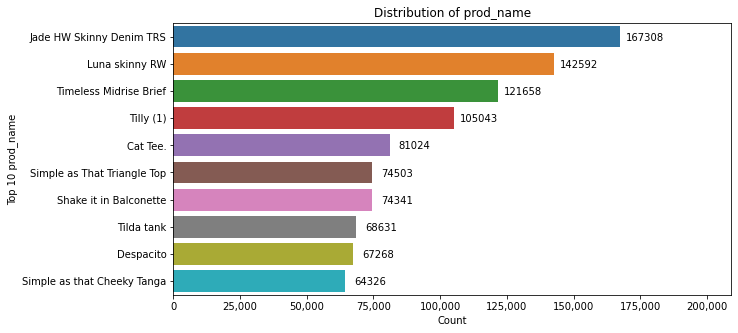

-------------
Variable: product_type_name


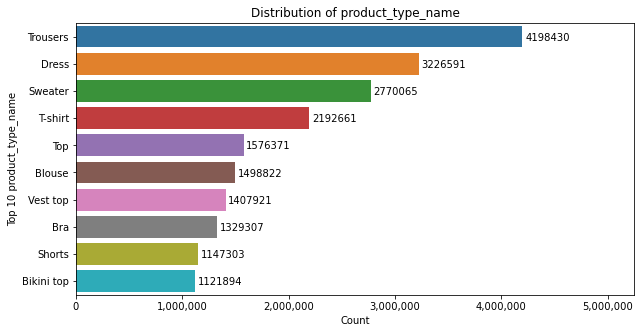

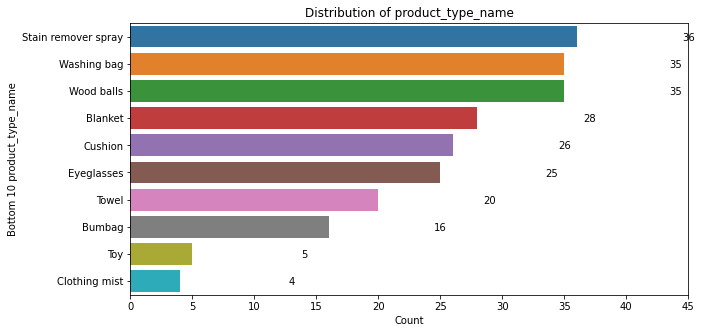

-------------
Variable: product_group_name


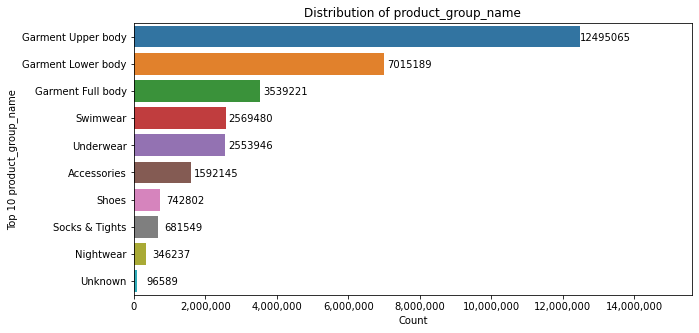

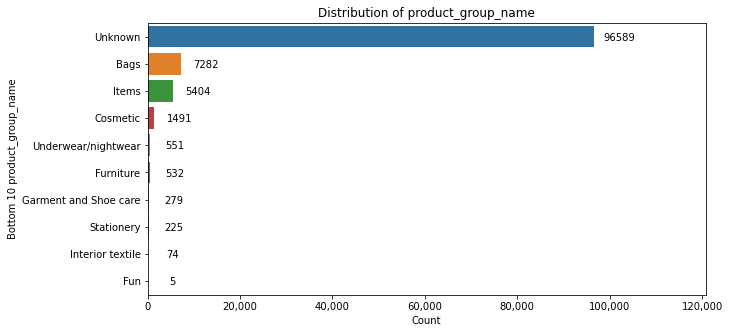

-------------
Variable: graphical_appearance_name


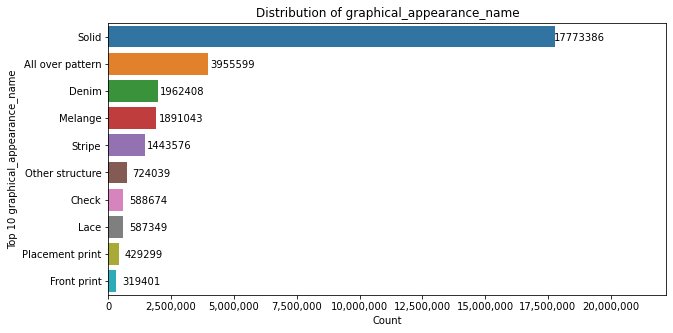

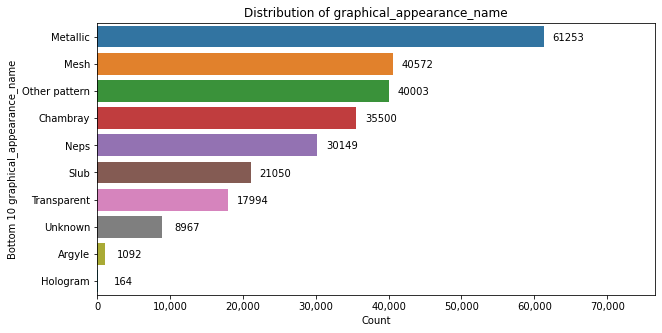

-------------
Variable: colour_group_name


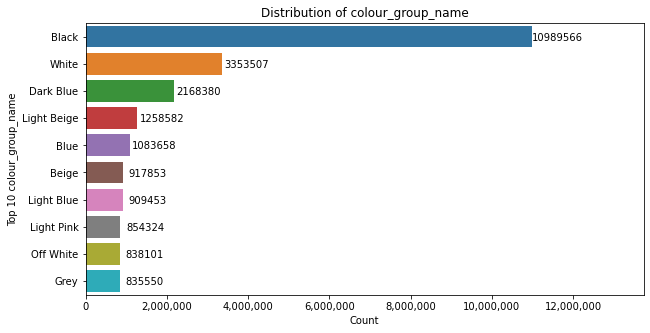

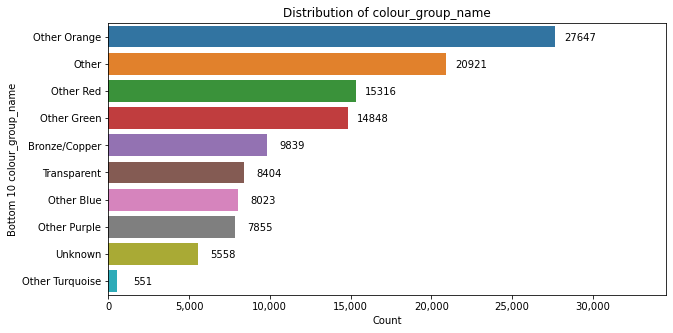

-------------
Variable: perceived_colour_value_name


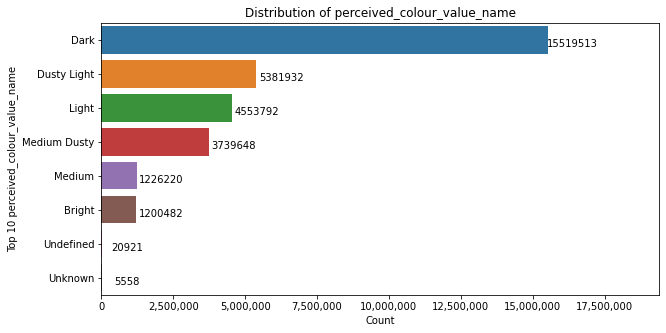

-------------
Variable: perceived_colour_master_name


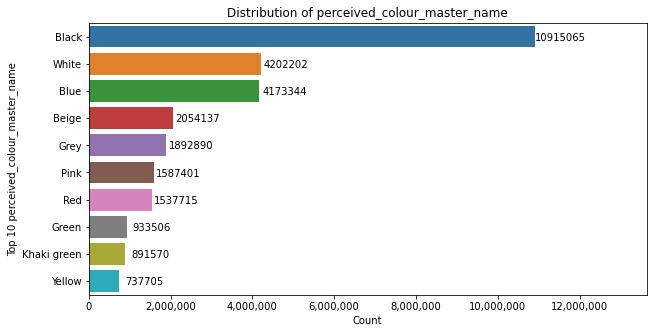

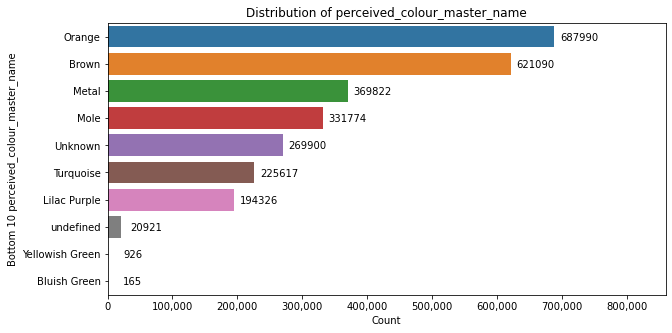

-------------
Variable: department_name


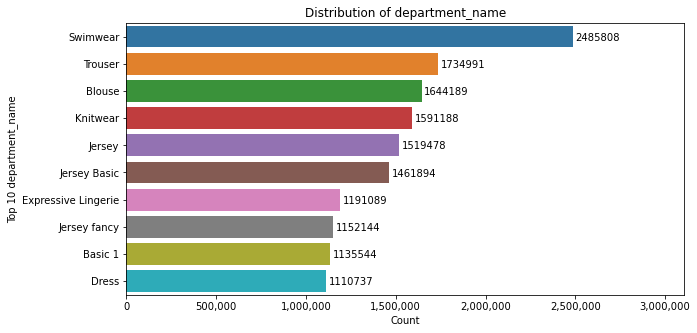

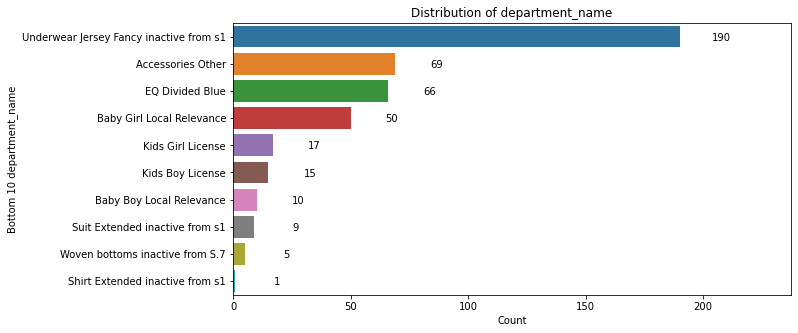

-------------
Variable: index_name


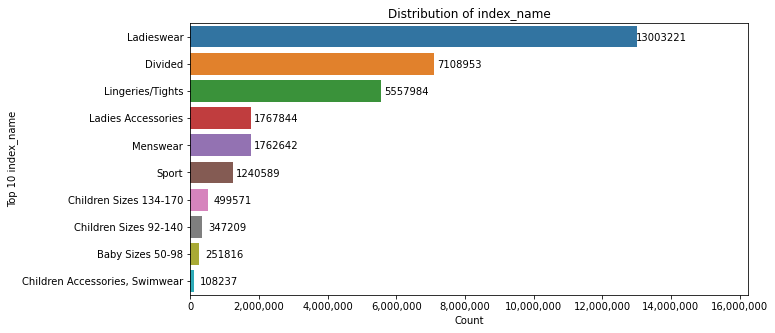

-------------
Variable: index_group_name


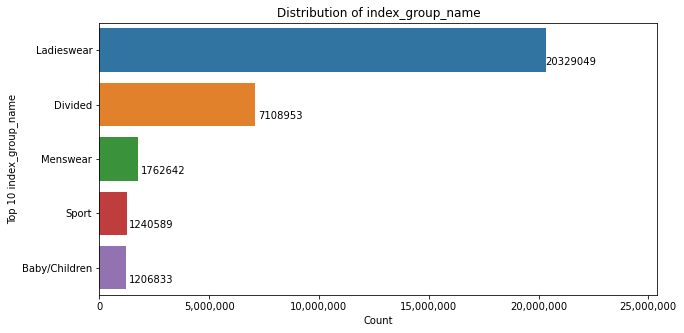

-------------
Variable: section_name


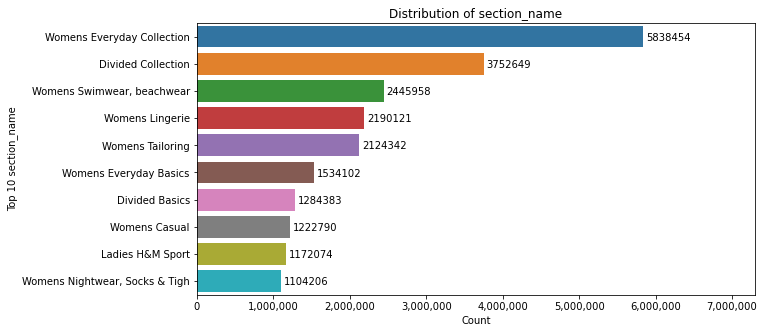

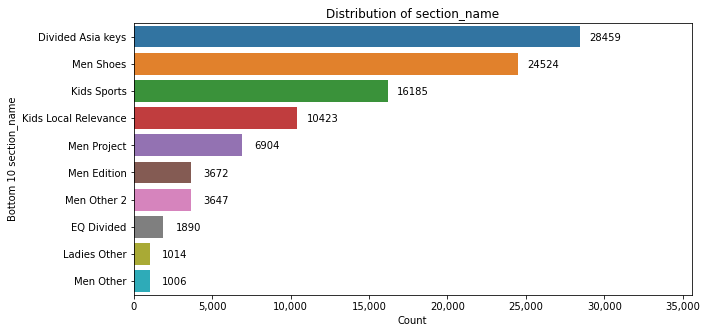

-------------
Variable: garment_group_name


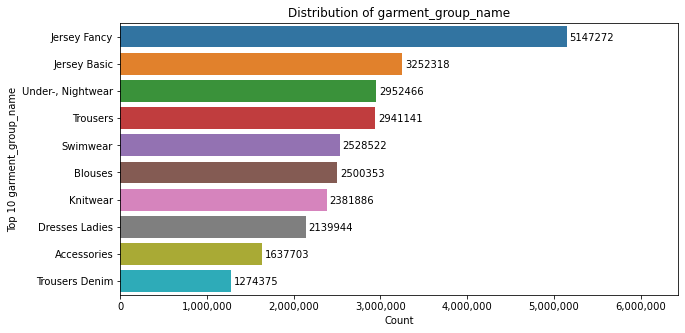

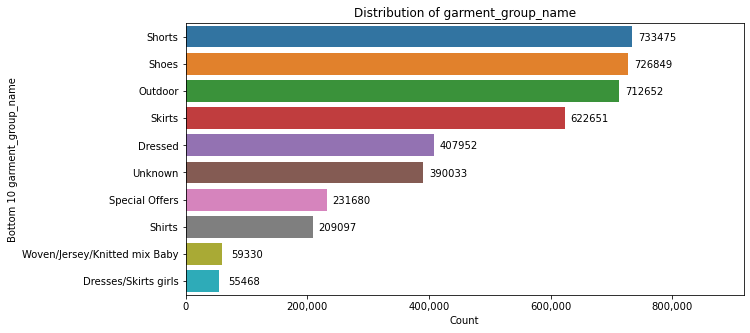

-------------
Variable: club_member_status


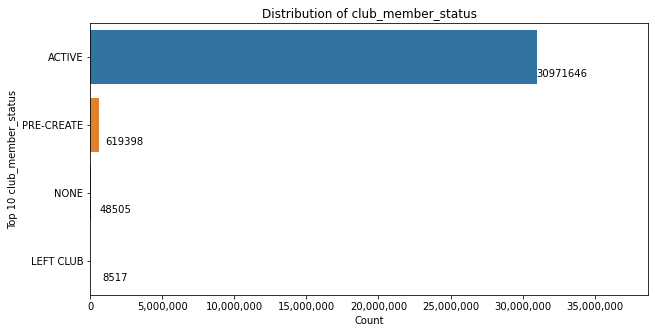

-------------
Variable: fashion_news_frequency


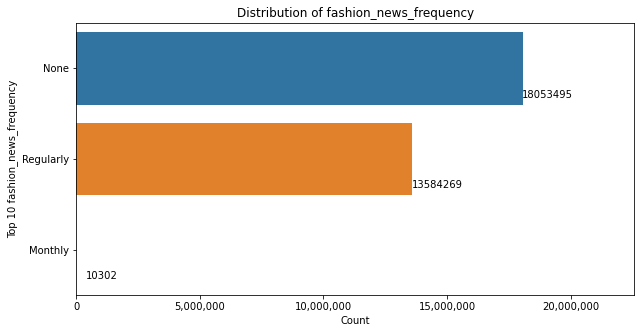

-------------
Variable: postal_code


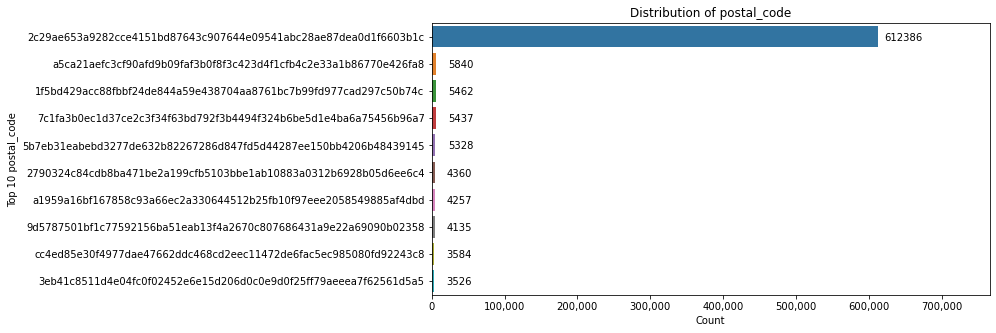

-------------


In [29]:
# Get Top 10 and Bottom 10 of all categorical variables
# - prod_name and postal_code have only count 1 for items in the bottom 10
for var in cat_var:
    print('Variable:', var)
    if (len(list(df[var].unique())) <= 10) or var in ['prod_name', 'postal_code']:
        countplot(df, var, [], 'top 10', horizontal=True)
    else: # len(list(df[var].unique())) > 10 > variables with more than 10 types
        for rank in ['top 10', 'bottom 10']:
            countplot(df, var, [], rank, horizontal=True)
    print('-------------')

In [30]:
def bottom_cats(var):
    total_count = 0
    for count, index_name in zip(list(df[var].value_counts()), list(df[var].value_counts().index)):
        total_count += 1
        if count == 1:
            print(index_name, count)
    print('Total number of records with count 1:',total_count)

In [31]:
# Check types for 'prod_name' and 'postal_code' with count 1
for var in ['prod_name', 'postal_code']:
    print('Variable:', var)
    bottom_cats(var)
    print('-------------\n')

Variable: prod_name
2-pack Mia longsleeve 1
MY DRESS 1
Seamless Push-up Biker 1
Jimmy Jogger 1
Edit NG 1
Sonny loafer 1
Elephant Jersey Blazer 1
APPLE shirt 1
Elephant jumper 1
2-pack Molko 1
Ak Moshi track 1
Pandora skirt 1
Gos Trouser 1
Edna 1
MYLA onesie 1
Llama tunic 1
MALAGA 2p leggings (TVP) 1
Rhine T-necklace 1
HATTER t-shirt 1
ES Dahlia dress 1
SONJA Swimsuit 1
SET TOP+WIDELEG 1
APU joggers 1
Sophie Set 1
ES DRAGONFLY dress 1
Harlem Leggings 1
Sophia trouser 1
Greger LS Body 1
Elaine Lace tights 1
ES Dallas l/s 1
Monki tulle dress 1
Square shirt 1
Sonya Straw Cros Bag 1
2-pack Haylee 1
Gosh Jacket 1
MAMA-FARIN tights 1
washington 1
RENEE REVERSABLE SCARF 1
Edit viscose trs 1
SHANTI Swimsuit SG 1
Woo 1
Sri Lanka dress 1
Patch Emoji 1
MUSTARD shirtjacket 1
Whisper dress 1
JERSEY SET BEANIE SNOOD 1
Megumi kimono 1
HC AOP AQUAFLOWERS! 1
Alcor PQ pump 1
SET KNIT 3PCS SPORTY 1
Long-jo v.5 1
Richie Cardigan 1
SET KNIT MALTE 2PCS 1
wooden earrings 1
HC 4 in 1 Smoke Dot 1
ES BOJAN sweat

Bracelet Manson Pack CO 1
Bracelet Colour Beads CO 1
V.5 SKINNY SATEEN BLACK 1
V.5 CHARLIE WAFFLE SHORTS 1
INGRID ref skimitten 1
V. 5 LINEN T-SHIRT 1
Bengal tee 1
Rebecka funnel 1
Brenda shorts uppf 1
Lacey thong 1
Brooklyn Hoodie 1
Roxy hood 1
Trento jkt 1
Trevor 2-pack s/s 1
VERDI tank+ 1
VERDI seamless top 1
SPEED LIzard Workwear Jacke 1
Bryan zip hoodie 1
MIA 2p joggers (TVP) 1
Bruno Jaquard set 1
Trixie body 1
LOGG Barb. cardigan 1
Petunia jumpsuit 1
Brooke Straight Cropped Plain 1
Obi Waistbelt (1) 1
Becca AOP plisse skirt 1
Bristol trs 1
Brissie summer jogger 2-p 1
Brissie 2-p 1
Becks Belted Swimsuit 1
LOGG Hilda jacket 1
Brighouse 1
Obama denim 1
Beda TRS 1
Bridal bolero 1
MIA 2-pack scarf 1
Roy lace up boot 1
Benjamin 1
Bow p-cap 1
SATURN thin cotton shirt 1
Bow cap 1
Bethnal Embellished Beanie 1
Tyra boot 1
Inspector leather jacket 1
Ora LS 1
Tyra mockneck CK 1
Betty Puffsleeve NT 1
Bloom sweater 1
Oliver Multi BackPack 1
SPEED Man Necklace 1
Blonde cosy off- shoulder 1
LS T

e95c42e61871a9e37c6432e0f746750dd61cb366de4f834e2bdaf51be6257311 1
6b14474a7dd726277dfa580d5af192169b4fd4caa77071d98ef630caacd4d439 1
3459986da5fc152662766f0ef2f240c0cf36daa74e3925479533f6bdd3719c26 1
0669a73f26490537bdb6ba316fc5d794c9e3172450bf9806cec4836a189d932f 1
06831932ca0be29bd5c55b19109ddcf73f7819fa282e69c05cd62acdd2e33ce0 1
34968f0eabfefc83b1d5134ad16c9c40ae34334613d2475742ac158e18eceeaf 1
c5975b987ed5ee1ac45f27128398ac9234a6ac5fc5255187cdbf0f80aa0f2c8d 1
1f2117900314ac8e32844d01570574dba5996ef3d08018c18f6884ba39714599 1
5aa82f04d1ae0a95502b6c9db74729cac9126875971c8a2c813e14d6c9d71fd8 1
8059e0b4dcef2f0db01ead02c70623d7e38965cde614f2a20d5c65550d223d46 1
433d17590bff748facb102e11a62b5f0f24766b3f65ee4775559036797949d18 1
ee43da54bd6a2edeeb46309a8f32e6cdea0b33675638ace5143ccfadf1bf60da 1
80615ecb3a3349e0260cf0810372e49a7755feffc7349fb34a249d4165875357 1
90d81d6ea989abd0cad55e9e9732ea6be27b2edfa3e6fe97a6e34db98e4c9250 1
34ac2dd0f875ead4c0e87f7ffb74b12f2108c7fa779c171f363bd737f0f1c6

cbaae2b493891e027acbbf4ed112753e8802c217288e724c89c8858b810f4037 1
08057c9ab2ec44200040c0a4cf034f464f8c01b0376d02b31c35b74fe9ba324c 1
75af8e95cddf7d9271dbe9b5720baa47e0e7eed8ff3491bb34e1db2ced836035 1
44a2454484e259ad13a607e4cadf7d6338e1638693ea88c443fc7cee76ee2195 1
5af87f15e1473107efa4fb6fb273d3545c75fa0ed00f242067aa4c83962fd6dc 1
fd33444991a966518fbe53ded65cd61fe07caafd1d655dd75261737369a94163 1
698de3d682c11725685f7442c4f5658fcdb6c3658b23162707912c61d855173d 1
9c0287811f46e3d1c88bde2d5d14aef997e244bc8f79599cb986bac8dacfd28c 1
698c513deb6626c43847ecc0cfeda947e1b74407ed80a52f131ed43ef7ba0b49 1
e8d9fabb12e6041058bc8bf62309ae7e3634dba4fa4fa482fc9dcec4decdbcdf 1
b98123a8c54f804a212702eb20f0cd18cb643a45be51a72577b72d516d9963bb 1
698b045c5d07743eae701c1895a527602d2f6910eba2ee585f15aface3942d7c 1
0809891a0ba8be2e0531c8327d442476f64d8879e7d28add1c42a6f995a6ea2a 1
eec93c23524aae0b4318f8483360d7bb75525aaefad1f0495b74a7d92a48d93c 1
192ad62d1c27b68ec94d681396a1a7ce8706f1dee965252cce7f090a5ddbd6

07dfef71d77cb048a1ce31de91c3c4d43b21710fcc0978c6c150348bd03ca621 1
4457a25216c40e1dee1ae1bae64a431cf607d71caecd5d142156aaaf0c0e21b3 1
ad9b59b1bf50b101ff1c9819bd3c9b454698d4086aa8e98af69efa2c60facebb 1
b9c28dafb4523febcc1e87d61a8f65ef6af428580a5abb3fa61a2fb4e43533d6 1
7558f71a77a503d154dd68a6bcd878329f0e1ef8d2f49ae5c0cd54be87bd572b 1
ee8e552da7b940ba027c8f453695f822f852ec0ed8b8ecde25022d8fd825260c 1
441bb08ef7ae39673cad4da5f254f62dc138cc86f7370a8457f6864815b8fce4 1
ee8e95729dabc44b31f20c31ff37644a33a54b85d62804173e37a5615dd76d08 1
441fcddc7b69df7df40e32d579017b0b4e3008234be08d977721d3a05d22a023 1
19637d026f466dd87ea7220ddf4979f57254b931f2d5a45582933479af66fbdb 1
ee8f23ee8f5317e22e0261faa3c024355695ad7d8722c1f96e6df349c0ee73f3 1
75543d2da0d72b746961b3c9ad6e367e524c3bc1d93dd2c8b72081d365989f65 1
076ee7c0f8065d5209c0932a7a3731f2f76fce1a9145861a850b111b73f4381a 1
9002fa69c22eee90d55715e9e03ccabee8de7f413e0fa8ec48bfd7a5bc534c4b 1
a9ab8497cd40cf99d83f543070742426b7b10f8a5d1e2a9386569806464389

3c0297df9907fffa16679ffb398c08ad99479d0e0f32910d4f985ab16f80b15d 1
583c8445537b1706fe2d9d692fb2445ba023c4a12698b2f5bf4b0fa246763b2c 1
3cf35d4461e6229fc69670c3d426b143f5cd4fc8f040bd49301a125b72ca7984 1
95082f79d6483212dff2b033dde29fdb1dd8ad2c97215ff5f9ec7bc473ea1e3b 1
aba63b89679e5ae5a1ffdff1c56ed3365a9e881438c00da3eef6df1f99331cce 1
3dc25cea47aa09ca91c7e719ff274a35bd32a21425605464f32b928f35209b36 1
3bbd68e08a1dca919eff411a79b2f15c1c5f5adf76f613e1241c55284d7dcefd 1
711ed86555b09f998ac72f4b6c3e3ecff0cb3225bbe9a516da61a86274683a35 1
d484cd1c34c310cee115e1b69b2ffee75edd3e81e5066b333838924bc5a8537d 1
58a269135458c6fb300e1e858b9ba485ed285442bef2bd607ea8bda3b8ab1a70 1
704b040618d989fc60ad6e0dd7faaa055c64aa4c260712c06495a2f4f352c4f5 1
7117069fe31719ab09cfe68f43542afac7940336d1995a1f4e5cd3e1cf7361dc 1
bfaf7c97453ce889a5289bd077f7d1650c88c249adb0d6c3837705aa26a2ba4a 1
aba08520111766ce9f040b24a2430e2ac505e7993ebbcf03fcbf61451abcea00 1
c644606ff72bfb07cadd61152f4f4392dc06312cb58c074b2ac1754535285a

3664256df513a3d6c18526241666efd247114e347682654e4cef8d497d204ea5 1
91ddf6fe101cc61c0171f6ce38ea9193965097826fd4b9f58819cc29e9ada9fe 1
db9b74f98a1e95b2e7dee2865c8773d18874031f9ea10d2b0f9f3679bb449a94 1
367766cfabffd3a9b9ce7cd1bb373a082f7bb1aec10bba8da28bfeb4015a39fb 1
04be0ebb9a528caab9dc4ea371a75f4ef35d590acfc36d62fc99b578b7127f63 1
4168de2ffdeb98681db22297116f3fc2a83c2dbf4b350fd1c28782339c0888b5 1
04ac517bea67306ce5417ed414323bcb0ae7ab1db13d48ccb759376d47fb4a3a 1
738863e91077b4318c71bf16154f7828364494d25ba41d76e068b0693ed76321 1
5a0f7bec9e496da6819d7d22401942fab3eaaa5097eac9d221c7d77f1ad0db92 1
fe5de97b1eec1d7421d5f04f113482ed314a29622e2cb0f7d9d0f9bfd954532f 1
368b53263979d3ddb2891e3cf41ddb2e06d991398da5272b2849602623935738 1
6cc55a3eefe378cd68773da87fa73ece3cda01d4836954b446428a59022e9a61 1
bbda0946d19f1213d5dab83cbbc75ad448c44c8cde96e46e0022bf36e095ed95 1
8317ccd02f0c159229cafb4c65773db5f5e0e24cf3f9d24e283e2763ea3e2ea2 1
6cc3bb5d0b6084d59563682ddf21a6c7ece507cfeb4beae616eb868f5ec657

10c54828b78b90013ca8eff9617c6b7c7d6997262d6a89c2d5b097ce18f4a069 1
c95a35d057779fdb76218b3ab90bb694c9a36f0098c663126d074a3db88db57d 1
df0e1a17dd6062a6f635ea466f43d2ed9446ca6867d85003e387c38da9bb9159 1
afdb0829af42d384a56a0fdc7ff837da8120b8252623c7ba7219e8c79f21cd97 1
a2a032a52bb893d9799d35708f1ba3c0151886f6d5786298a6c9846bc8c54021 1
28b5a33908ce79d49de6acfb5d9e1b9852abaf9ffb1d4bc5810c4447e667a6ea 1
4d590967178760a37b533733eb9f051a853594a78366d033daa2449b25c7913f 1
10c76f3083a6a009325d67e4e41896a001183c21b5c72d58272c2b1dea6db1d1 1
e5e6a38ce71bb3ca3d7eba1fbed89fdea3b0f6936e5d5e29142d2956b2f935ff 1
5db60a3af311b74741f1dfbc1c9f184e6794f18b83fe9697392606a04f42ef8d 1
a6d0d16152edf881adef3e28e7a0ca2e16448c8767608cb5a3abe43c2a6da2a7 1
28b1ea6ea7221fce2a3e519bd4644e3cbdb0d3d0b4b53dbad041d7258075c182 1
899a5d77513c6b4246312701f47671ff758035b6ed0f33bb87ff8f230deb769d 1
4d7bdc6c2483c657d19b6f2812147b865cd9ebbb8d236455d4d42e1f940b0f09 1
c952c8ca4c03b5175041dbf9b307a13a37caa5acfdb39d984cb9719938ba8e

b373117cb7bf35909b74b4e345c321fed7dea6f47ce0fe9cd8c9579dec1f5c91 1
a2e4e8d6ca7d7cdfd79d351efd90ebd0c783c673d999af5bb0b77f1ac062c353 1
2349e49d717284f222f7bb7d6d9ecf2ae41b08fa1d017729cb19e142241c3360 1
4dc304954bc6d8f43c8d0a603864e868f582c7fb346676a3241690fc0e6f6528 1
7ae38521cd27020d486a64b870c57a7d37007ae2f1584ea35961ed63b49849e1 1
284b172bfe868936d6d4249a36f4bf981412bdd5d19fe6501b35a5c0a456cd3f 1
4dc279ff9631c97a9588ece43473010aad6526f5da02de3ab82488d4f96dc54c 1
284c449ddf8b655d168f8b626775a75ed07d449b1b6ae412d07edd0f414e13b8 1
b37ba330d1e2286373c78edc59a9d152d8b191d78d6285083b4be7b4d9fc4505 1
61ec3da93a57ae5e624b7689ff457925b01b3e24621e539ec004480a471aba5d 1
a6b85c26d660ed445d1c3da5dcdc9f6625d1778dee2c670fcfe5d237412fc91e 1
c39ba789ae62e6b1bab3ddb065b8c3fba277cbe37d50ff603a279f16815bd1c0 1
4dc03483ade9c56e1f5f85992dbd2f73c8923295841796468645d6235511859f 1
c941d6a67ec1a6cadf1a4be57c440fa299ae0b3fe46b2563ebfed81dd0e5675f 1
234824597ae4bca106aafef7851759597aaf65f07a6b1b3c2c44c596a39ff0

24328ab29bd4e9c99b59c83af921b59f18d38925c8503a9bbf0db383f3c9617b 1
1383ac79f97e2a849be1d3f366526cb5cc05c18d1b9fa0cc3ab0aa0fbd998d0d 1
86ab9187c67f8e9a569262a3596aeaa3096e6be5e21fe1a3ba2f76f74da54865 1
14f6eb981935e505a7e7bd8b90148a65ccd4e81f1bc64f0fd1bac2f33b8960f2 1
f32c6c2636826df18d8ec7ea648ae3fb5d807128f8f75d1e5ffa61a23fc4bcb5 1
5fcec5c869f9a2ace524cf26c023182c71166e3307636123fd07a73dca656f6b 1
7c72055701ad9dcca808014324e44963dbb4e06d77447d6d7b0531c67acf6e7c 1
b19c270fe2046ceb4c5fde264082da59c65b3877896bb84e66dd9e16af562772 1
d60e4ecf1f3afa41a86aaf0f98691e523ab15ce99faccd36312f67597e5b6d04 1
879e271a8187c6553d826d744ded5d262c103ab5eb637bf0bd8dc2b7fd1e69f8 1
13898daba9c8cb8f8fb827f730d4d59a37ff5de45befac25252d2337e540d85e 1
5e8e33ec2bec984c51ef3b5de92faa6aea244a5a8962a056fe944015175bf8e7 1
5048a5301f116abef5e7ea6eb50b72bdd0a0f336f9a4cdfd1716b6336ec040d8 1
504f1742aee3703b3bb25b59f083982e32892135ef0032ecfbca7fa36f988879 1
7c7ea57ebfba28f20b564f6e7b57b42c53af04202e5ea851cb26a863105da3

c82265a270e59bb36dbb8f59d1d5a322b52de42c01778be9a792b63cc0ea2908 1
26a128ec55a5b1e4c7c8497d573d95926e18203b6cafa13813861a34b17c2691 1
d5ff1180e33a2d7fe4a1bc9a1edff6a29bf6fb33d03a1798ecf4f61c4caa4305 1
269dc289871dd8517f3a7f9a1482b27b85695c2167af350ccf9bc692b7293da2 1
b23c607e6e16abb99b3c9169e44cb60f1d07b90c6d024679d3b1437228bcc5e9 1
d67ade5a2b0e9b8ac92a31d64d185a1c17130ffeb6b236f04739a4df4a0e97c4 1
f99b547a6642a6cc5102c1603d42b5d40a9af03249a9f94df531c101fc137d3e 1
51b7650d00efe098d6a411fe18c8a95d1bbf50753efdbf0f941e34a70ed37702 1
12bbe049a39865b73c0380ba2797f35b42e2aa91f96cbbf80bb6a561c9640708 1
4f6550c1d26d896e1ee7b70452cec491c2f54fe4ce45f9796fcf8463dabfe66c 1
b23aa99bf485e7cdec6b7736da75192efaf7bb4b7853de890a15346341ade0e5 1
a642d0926f33d771d0f210c0dc795a201eb288ff1b4ed8c74c85abbb6841eb0f 1
a642b964a25da37b6583447b08b1d82ea8306fd0739d49af954f13d3ffc21e8d 1
a418c6a489d313efd78d57119fc283bfd36a7cfb836d381e08e1676891f6577e 1
2699838dc6129c80427077b754224d8222263441ac395cefc5fe85fdd203ae

b8b474336b9b94e366f0413cb858adbcaf50e5e69a22674de0ef94ac7860c954 1
9d3ddad22a3eb3779258451e84611bfd167970b52791e629bee5fc86c4b1105a 1
9d3d09ac2d52e653d477e342c4d48d5ce4ba922b2262cdf297f5883c3a92acb6 1
4613a3a5d7be7ca61ea8b23f6dfb6aba636e06610de701c1cec0f16b120d1df9 1
9d3b4efba078f619a67fdd76d02a3234219cb2f6a655046398d30530170a3078 1
687bd036d242d8bd04d404f8688f78cac4d795cc13f12ac9b8e284417d3a8a9f 1
312b2bf55bbe63a507969779d6305780bcd0041f3b6d3ca5902bee936834ae54 1
76852a52eaa8b40e186e5bbf174906335deef630d0537970f5db6902f8f06f49 1
c1c95321a530689e9f36df318e905058c5f6908433a2efef79c6d326a6ee1322 1
b8b825234a28a1a3b430774c066017b586708b0b5e8fa5c24bf39f934db2a497 1
ef534c3bbcd03e8c7ed41f79be200b4ebd5c9844fb4397a04d07d8bbb95be950 1
7fe1ed5277af2b7496e878a782abde639c33dcb6485bff775f685691fa9f7a6e 1
8e9b64a1a9f8ce2da9b7dc3803c866b4788afdd044f53f70c18a25b2830500ad 1
b8bca95a3e802cb9d2d4e95e4871e48779b91ccfee185e8c0d0acc3cd23783c7 1
b8b443aeb6a1ef70a1a3b73a5747aa57473faf538a5980167df6a8aab58b1f

2aeffefbe85fe3adde889beef650b0c89cf683cfd8b3d6aaefc7645527abe222 1
7e71dd76c7335d31d830626406557a61926376164d3d0686d6c6236af63eeb59 1
79907fa12fc24e5a7daaa45194070ff29345a4693f82a01e409b8a0bdde2f690 1
8b011ce5eb716ddfdb13d4f760cc367ce18b5682f48e042b2221b172da81fee2 1
0ef2c9d0248cfd55b5f9125c3c2c985dbb21e901c2598992c4227df97a5b0b8a 1
b5004e5feee534e6a85ae2a45bb1712b450604b7eb306f321c3facabb576b20c 1
c4e5e19e04860e957ad951a5e36391593002c5b2104822bc667b275c1ae79c97 1
4b85a718cdd76e87851c2aef0b8c81d90d76bf709e6c69194472f288520e9c5a 1
63d567b6672b3134bc78a0dba0c5d741b04e519bc2bd0355c0306c4c21cb551b 1
a75c2e9aa1b1877a1dae90a484001a1a1ec4bce0cb8ccb11431ea5ad608680d7 1
af66827bc2a19ce38c2f25282571df36f0eed12ba312dc399e222f69230d2169 1
5d27fb30e6c8fb493b58b5e2cd2f1b81df47d75a8ee3ffb68bf74740204fa1e8 1
2afcaa0da54a9d00d3392dd53aa801564e0b153e72a2dffb7581b9109f5a1c7a 1
a10a20e30e1f8807336db148615adedddd4c3f6473d99d94516867c644db81d7 1
af5b195920eb8c6226723597c622b92a9fbc3a6d40e8dd7867b5087cd4e353

5397b40c0f57b4f93ee0c399bdc174d0073caa3c2a9fe9007967ab85fe94ede6 1
f0a41ba769825f9ad589b057882daa3fa496487879ed76c163e2bbde9d144a16 1
fb86353d56b9f3e3580650b8936888bf4132551957df0c8d08a3a5644b22aff6 1
b64ac1ff530cc66e2d84ed015b36fb3f8cc0332f6db9a53cb1e8c44ffe1ef1b0 1
78837825af754ea154e3fbc0588000c7d324dc1d609881338ae96b203b497cba 1
2d148bc5fb7c14a4655716c14fe6e3d9bd466ea0b5d38869b41b26fd4a67db6b 1
850b6e37becf3f85e22e394742d2a705c3a68ac77d1c6876949a9fe1ced2e575 1
b64a10cfb65def6a17d1a820fc2ef258fae5f8eca405cae8cf2cbf9e68ad05ac 1
0d0912f966efeaa5a49b485c183e6367e044d23a5c7ab75a7b00b82d14e2bf1c 1
49bec624c46f43f0fce49ab85f71b111430c09c6b5545ac1caad0889a3124b54 1
2d113c65a7652d2f26df0c482e3aba5a897c56dd686b13ed715975a2b8dae10c 1
b648acf65c1893dcfe028420b4d193a67b422cc808947545af204d7466f40699 1
21b210ea16c837815831fb5a7bb6e7cd7773cd12c598c2ad0be4bfade601b0ba 1
f0a4fabec305784b2bf1361812f01d4075188f1d90960b5988b157b38cfa9e5c 1
0d0607ef4bb8b09594f24ebf65fff97ce0715d145da7eaa64d7522860bf39a

### 2.4.2 Distribution of Continuous Variables
- [price, age]

In [32]:
def hist_boxplot(df, var_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    df.hist(column=[var_col], bins=10, ax=axes[0])
    axes[0].set_title(f'Distribution of {var_col} using Histogram')
    axes[0].get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    df.boxplot(column=[var_col], return_type='axes', ax=axes[1])
    axes[1].set_title(f'Distribution of {var_col} using Boxplot')

    plt.show()

In [33]:
df['price'].value_counts().iloc[:10]

0.016932    3397901
0.033881    3389212
0.025407    3250148
0.013542    1489874
0.050831    1486976
0.042356    1478483
0.022017    1280740
0.030492    1216136
0.008458    1068185
0.015237     702884
Name: price, dtype: int64

In [34]:
df['price'].value_counts().iloc[:10].index

Float64Index([0.0169322033898305, 0.0338813559322033, 0.0254067796610169,
              0.0135423728813559, 0.0508305084745762, 0.0423559322033898,
              0.0220169491525423, 0.0304915254237288,  0.008457627118644,
              0.0152372881355932],
             dtype='float64')

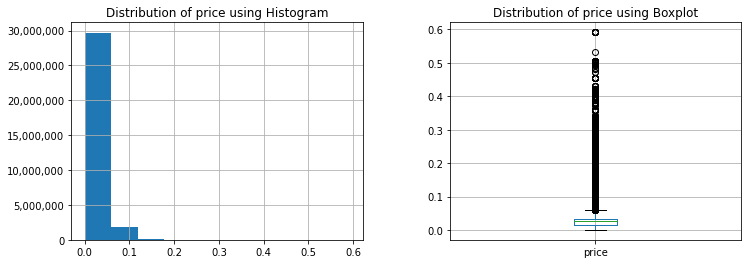

In [35]:
hist_boxplot(df, 'price')

In [36]:
df['price'].describe()

count    3.164807e+07
mean     2.783240e-02
std      1.918238e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

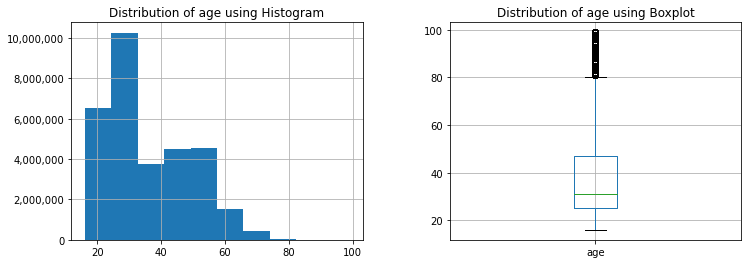

In [37]:
hist_boxplot(df, 'age')

In [38]:
df['age'].describe()

count    3.164807e+07
mean     3.603827e+01
std      1.298003e+01
min      1.600000e+01
25%      2.500000e+01
50%      3.100000e+01
75%      4.700000e+01
max      9.900000e+01
Name: age, dtype: float64

### 2.4.3 Distribution of Date Variables
- [t_dat]
- Obtain the number of transactions over the years to see if there are any seasonal trends

In [39]:
def barplot(df, var_col, title=None):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=var_col, y='Counts', data=df)
    for p in ax.patches:
        ax.annotate(p.get_height()/1000000, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    max_height = max([x.get_height() for x in ax.patches])    
    plt.ylim(0, max_height*1.25)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'Distribution for {var_col}')

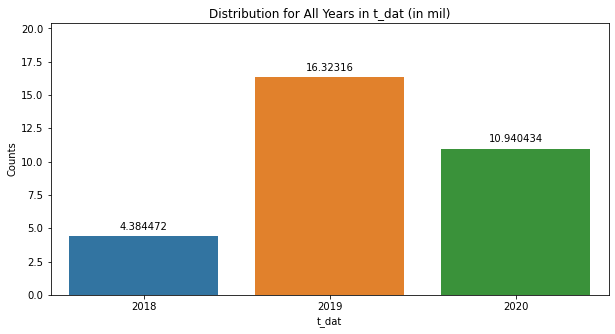

In [40]:
# Distribution for all years
df_grouped = df['t_dat'].groupby(df['t_dat'].dt.year).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for All Years in t_dat (in mil)')

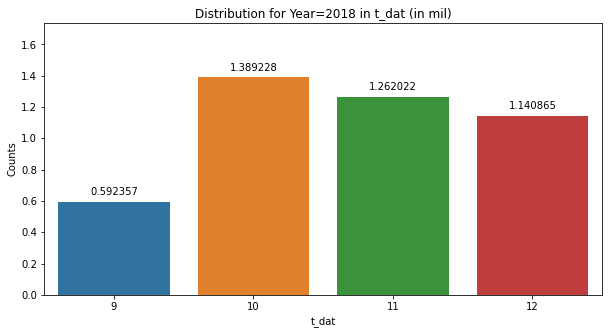

In [41]:
# Distribution within year (Year = 2018)
tdat_2018 = df[df['t_dat'].dt.year == 2018]
df_grouped = tdat_2018['t_dat'].groupby(tdat_2018['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2018 in t_dat (in mil)')

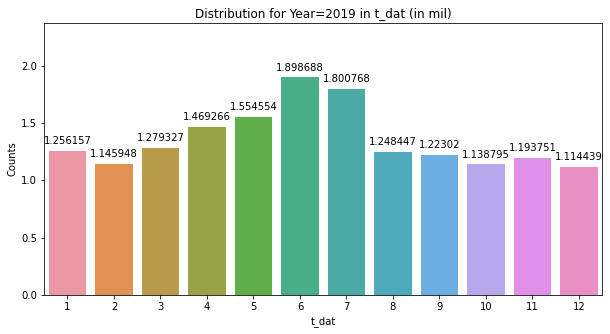

In [42]:
# Distribution within year (Year = 2019)
tdat_2019 = df[df['t_dat'].dt.year == 2019]
df_grouped = tdat_2019['t_dat'].groupby(tdat_2019['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2019 in t_dat (in mil)')

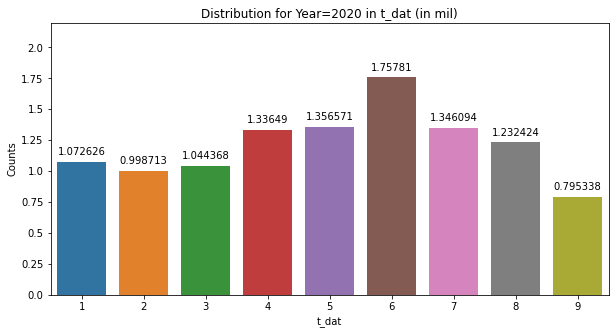

In [43]:
# Distribution within year (Year = 2020)
tdat_2020 = df[df['t_dat'].dt.year == 2020]
df_grouped = tdat_2020['t_dat'].groupby(tdat_2020['t_dat'].dt.month).size().reset_index(name='Counts')
barplot(df_grouped, 't_dat', 'Distribution for Year=2020 in t_dat (in mil)')

## 2.5 Relationship between Categorical Variables
Use the broadest category of each section: (otherwise too many)
- product_group_name, graphical_appearance_name, perceived_colour_master_name, index_group_name, garment_group_name, club_member_status, fashion_news_frequency
- Compare club_member_status vs the rest, and
- Compare fashion_news_frequency vs the rest

In [44]:
def cross_tab(df, indep_col, dep_cols):
    for dep_col in dep_cols:
        ct = pd.crosstab(df[indep_col], df[dep_col], normalize='index')
        print(ct)

In [45]:
df.loc[:,cat_var].head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,club_member_status,fashion_news_frequency,postal_code
0,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,Dusty Light,Pink,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,Pluto OTS,Blouse,Garment Upper body,Stripe,Light Blue,Light,Blue,Blouse,Ladieswear,Ladieswear,Womens Casual,Blouses,ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,Lazer Razer Brief,Swimwear bottom,Swimwear,Solid,Black,Dark,Black,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,ACTIVE,None,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [46]:
# Find unique items in broad categories
broad_cat = ['product_group_name', 'graphical_appearance_name',\
             'perceived_colour_master_name', 'index_group_name', \
             'garment_group_name', 'club_member_status', \
             'fashion_news_frequency']

for var in broad_cat:
    print('Variable:',var)
    print('Number of unique variables:',len(list(df[var].unique())))
    print(list(df[var].unique()))
    print('-------------')

Variable: product_group_name
Number of unique variables: 19
['Underwear', 'Garment Upper body', 'Swimwear', 'Garment Lower body', 'Socks & Tights', 'Accessories', 'Nightwear', 'Garment Full body', 'Shoes', 'Unknown', 'Items', 'Cosmetic', 'Bags', 'Garment and Shoe care', 'Stationery', 'Furniture', 'Underwear/nightwear', 'Interior textile', 'Fun']
-------------
Variable: graphical_appearance_name
Number of unique variables: 30
['Solid', 'Stripe', 'Melange', 'All over pattern', 'Other structure', 'Lace', 'Jacquard', 'Colour blocking', 'Unknown', 'Front print', 'Denim', 'Check', 'Embroidery', 'Neps', 'Dot', 'Contrast', 'Placement print', 'Application/3D', 'Glittering/Metallic', 'Treatment', 'Chambray', 'Metallic', 'Sequin', 'Mixed solid/pattern', 'Other pattern', 'Transparent', 'Mesh', 'Slub', 'Argyle', 'Hologram']
-------------
Variable: perceived_colour_master_name
Number of unique variables: 20
['Black', 'Pink', 'Blue', 'Grey', 'Beige', 'Khaki green', 'Red', 'White', 'Green', 'Orange', 

In [47]:
cross_tab(df, 'club_member_status', \
          ['product_group_name', 'graphical_appearance_name', \
           'perceived_colour_master_name','index_group_name', \
           'garment_group_name'])

product_group_name  Accessories      Bags  Cosmetic           Fun  Furniture  \
club_member_status                                                             
ACTIVE                 0.050619  0.000231  0.000046  1.614380e-07   0.000017   
LEFT CLUB              0.051192  0.001057  0.000000  0.000000e+00   0.000117   
NONE                   0.046531  0.000227  0.000124  0.000000e+00   0.000000   
PRE-CREATE             0.035055  0.000194  0.000087  0.000000e+00   0.000016   

product_group_name  Garment Full body  Garment Lower body  Garment Upper body  \
club_member_status                                                              
ACTIVE                       0.112048            0.221398            0.395148   
LEFT CLUB                    0.102971            0.217330            0.415757   
NONE                         0.106731            0.231296            0.406102   
PRE-CREATE                   0.101474            0.234179            0.376863   

product_group_name  Garment and 

In [48]:
cross_tab(df, 'fashion_news_frequency', \
          ['product_group_name', 'graphical_appearance_name', \
           'perceived_colour_master_name','index_group_name', \
           'garment_group_name'])

product_group_name      Accessories      Bags  Cosmetic           Fun  \
fashion_news_frequency                                                  
Monthly                    0.060668  0.000097  0.000000  0.000000e+00   
None                       0.049299  0.000226  0.000048  1.661728e-07   
Regularly                  0.051641  0.000236  0.000046  1.472291e-07   

product_group_name      Furniture  Garment Full body  Garment Lower body  \
fashion_news_frequency                                                     
Monthly                  0.000000           0.080470            0.211318   
None                     0.000017           0.108095            0.221936   
Regularly                0.000016           0.116819            0.221306   

product_group_name      Garment Upper body  Garment and Shoe care  \
fashion_news_frequency                                              
Monthly                           0.422345               0.000000   
None                              0.390962    

In [49]:
# Check for r/s btw club_member_status & fashion_news_frequency
cross_tab(df, 'club_member_status', ['fashion_news_frequency'])

fashion_news_frequency   Monthly      None  Regularly
club_member_status                                   
ACTIVE                  0.000322  0.562746   0.436931
LEFT CLUB               0.000000  0.992016   0.007984
NONE                    0.000309  0.899062   0.100629
PRE-CREATE              0.000484  0.923899   0.075617


## 2.6 Relationship of each variable with Price

In [50]:
df['price'] = pd.to_numeric(df.price, errors='coerce')

### 2.6.1 Relationship of categorical variables with Price using Average

Variable: prod_name


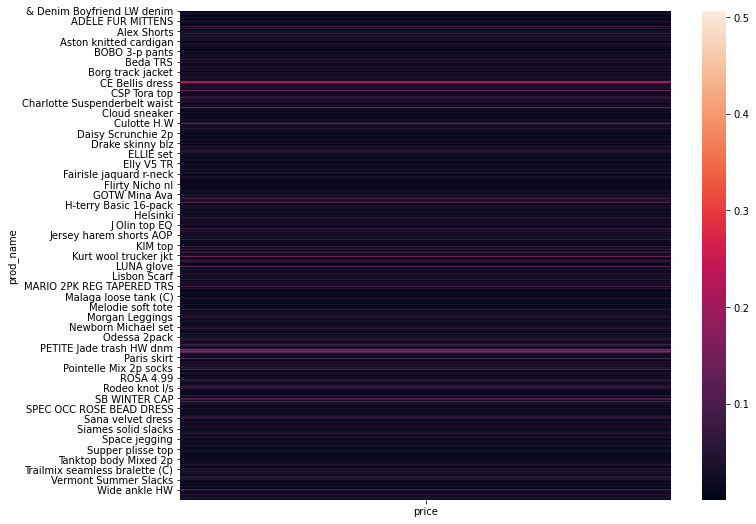

-------------

Variable: product_type_name


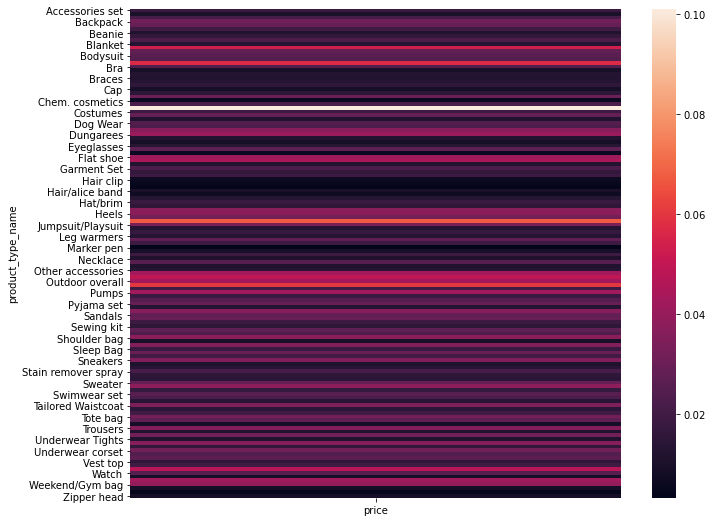

-------------

Variable: product_group_name


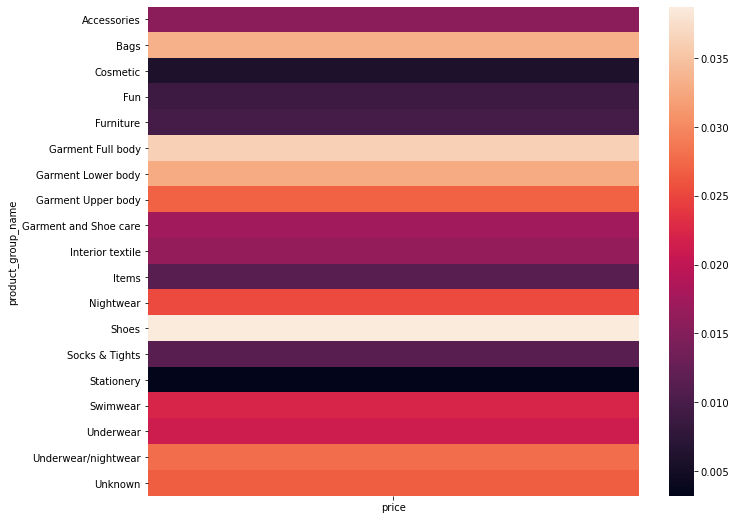

-------------

Variable: graphical_appearance_name


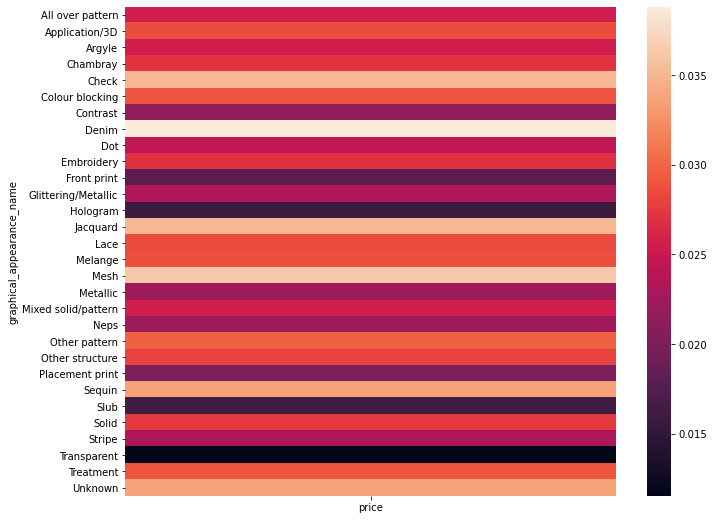

-------------

Variable: colour_group_name


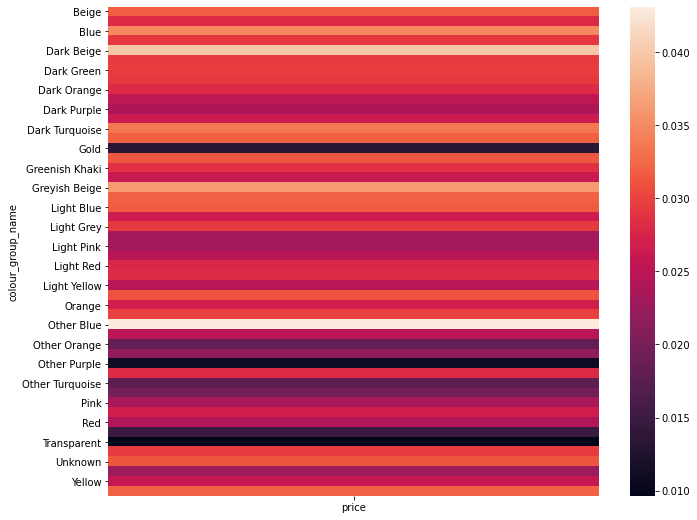

-------------

Variable: perceived_colour_value_name


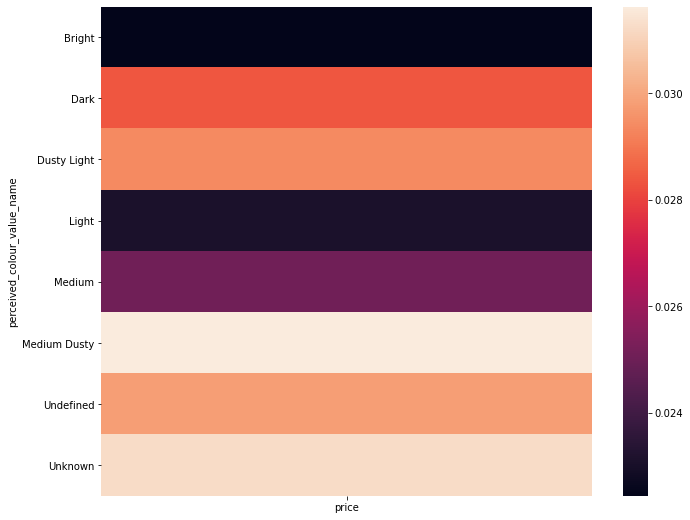

-------------

Variable: perceived_colour_master_name


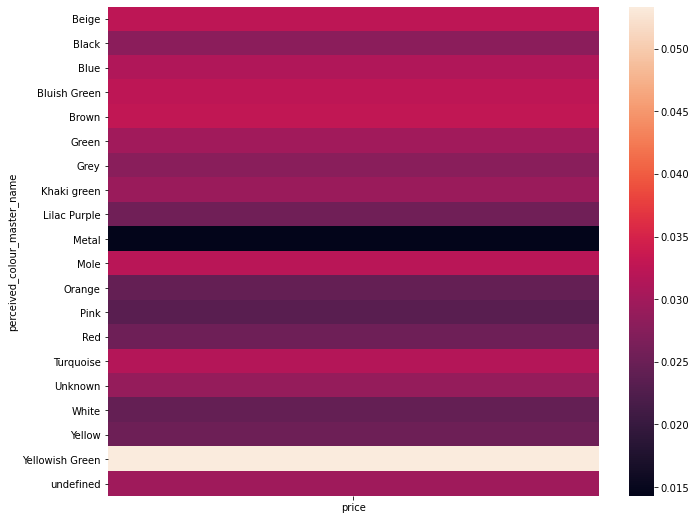

-------------

Variable: department_name


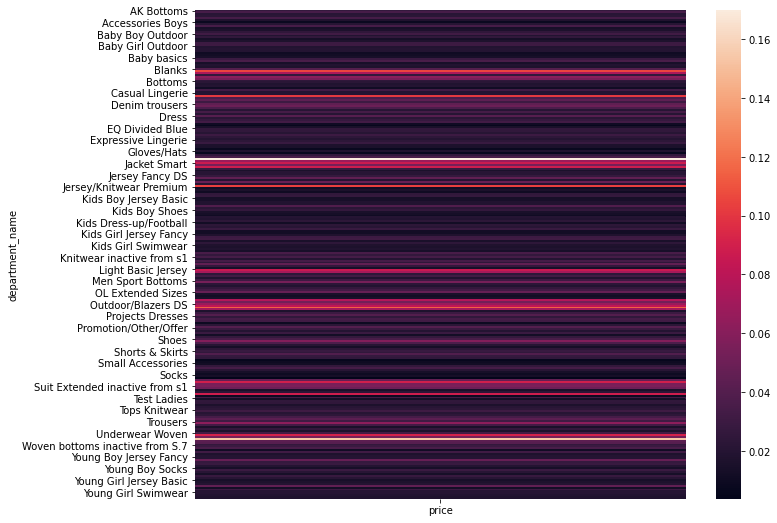

-------------

Variable: index_name


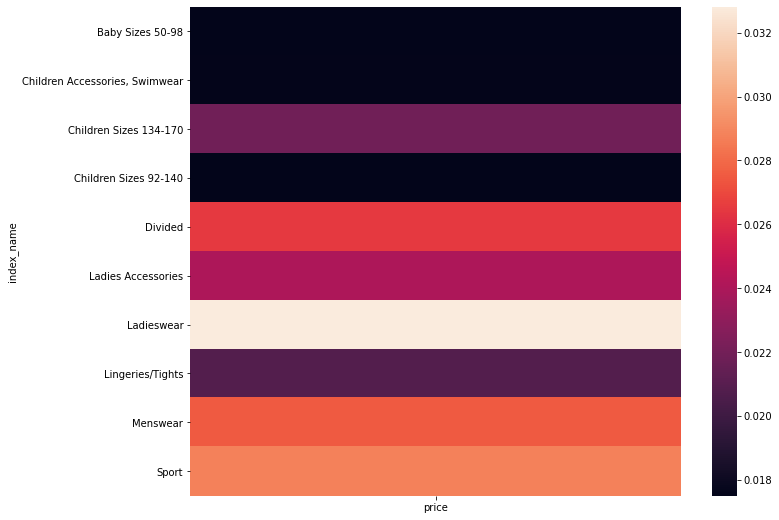

-------------

Variable: index_group_name


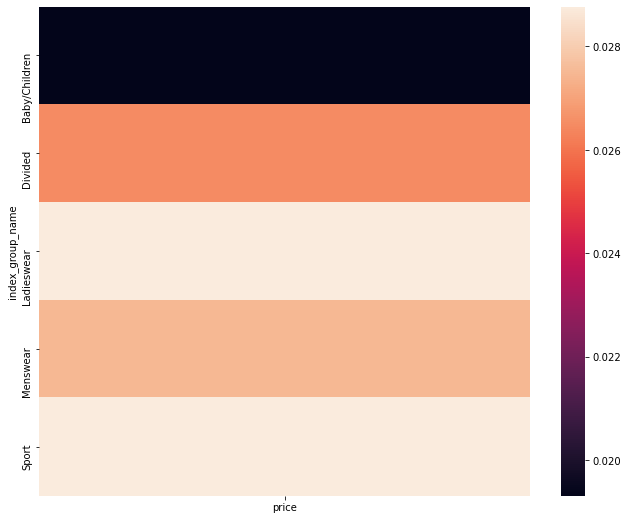

-------------

Variable: section_name


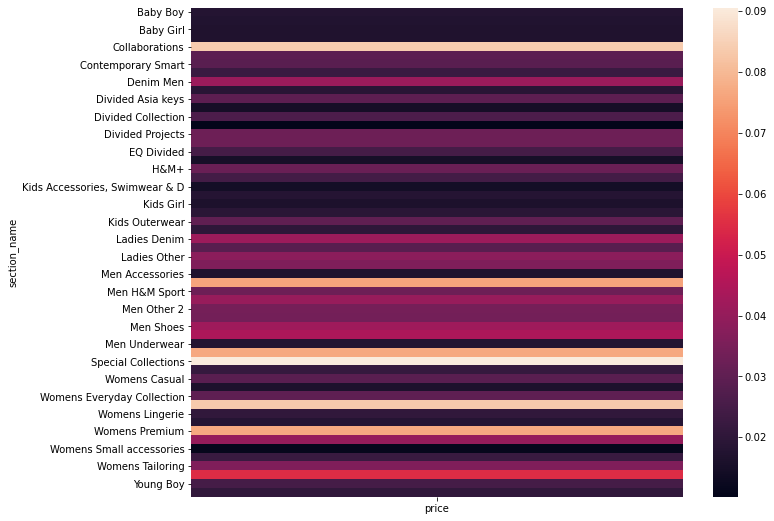

-------------

Variable: garment_group_name


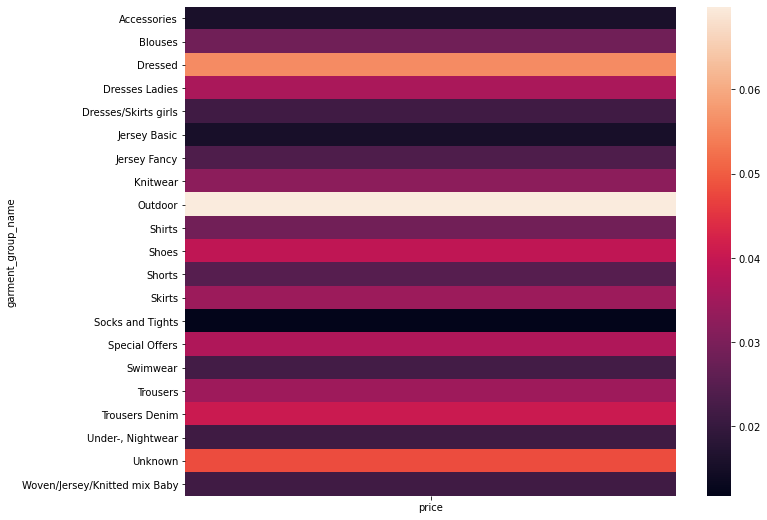

-------------

Variable: club_member_status


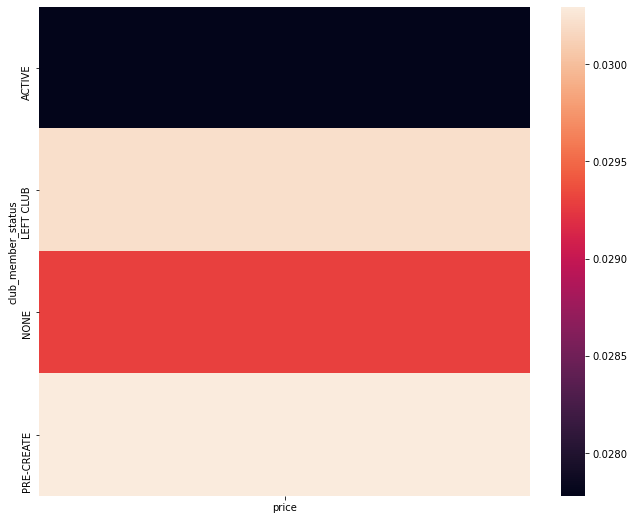

-------------

Variable: fashion_news_frequency


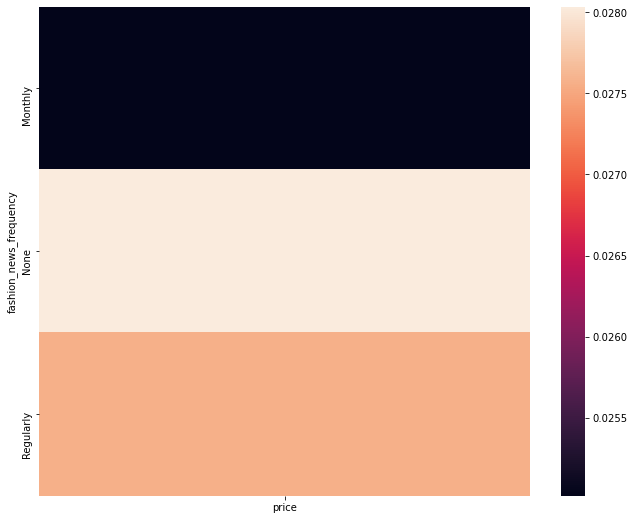

-------------

Variable: postal_code


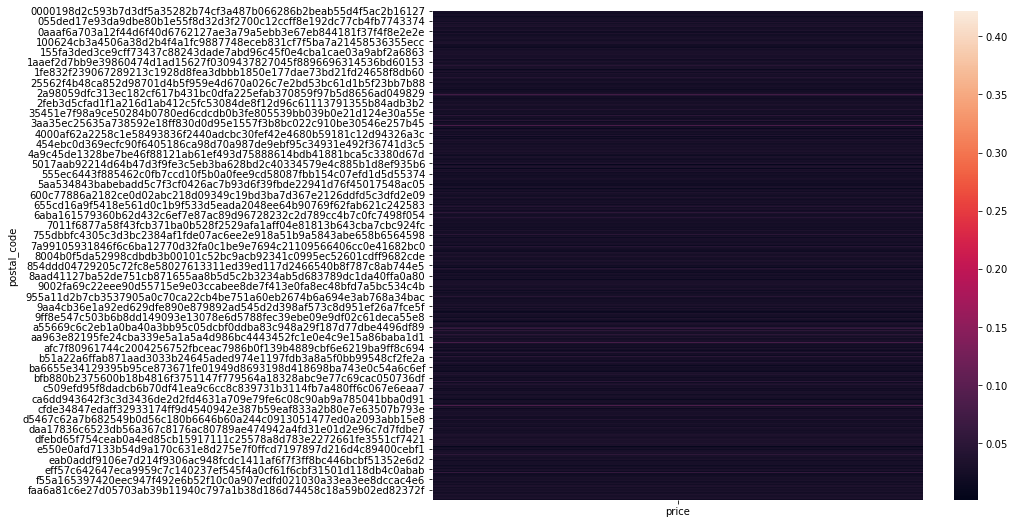

-------------



In [51]:
for var in cat_var:
    print('Variable:',var)
    
    # Subset relevant column with Price
    df_m = df.loc[:,[var,'price']]
    
    # Group by column and use average
    df_m = df_m.groupby([var]).mean()
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(df_m)
    plt.show()
    
    print('-------------\n')

### 2.6.2 Relationship of categorical variables with Price using Median

Variable: prod_name


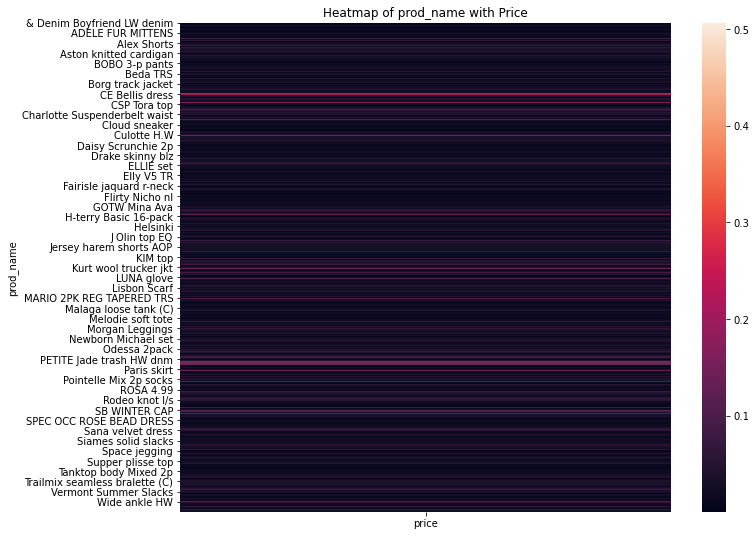

-------------

Variable: product_type_name


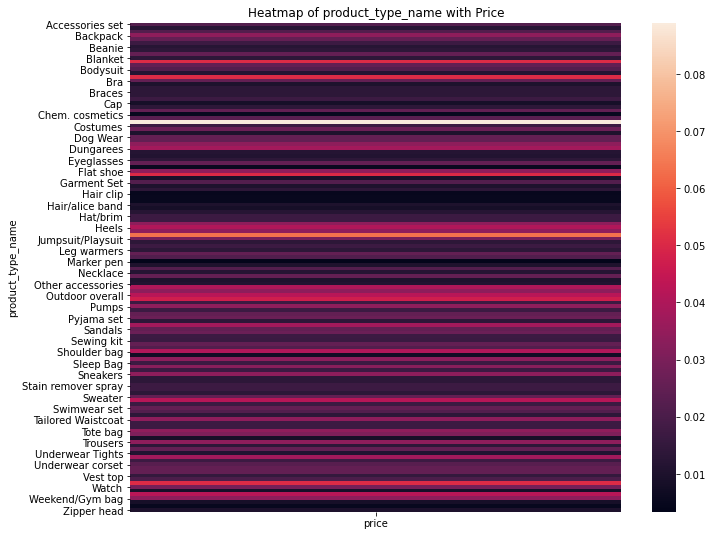

-------------

Variable: product_group_name


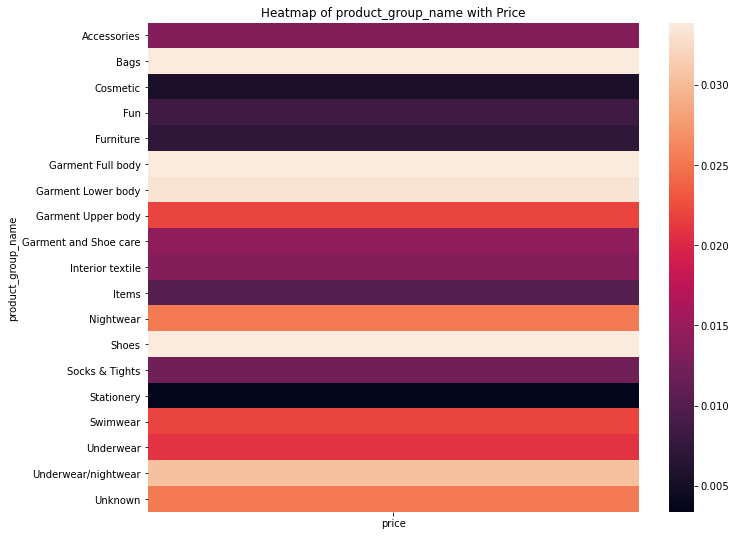

-------------

Variable: graphical_appearance_name


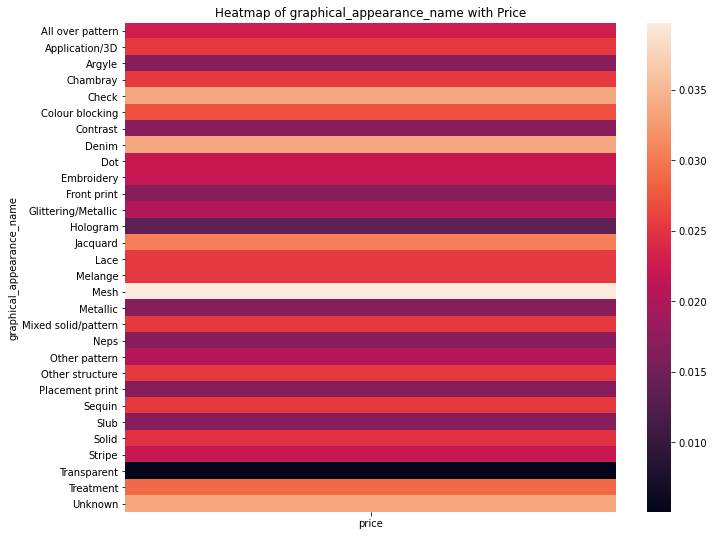

-------------

Variable: colour_group_name


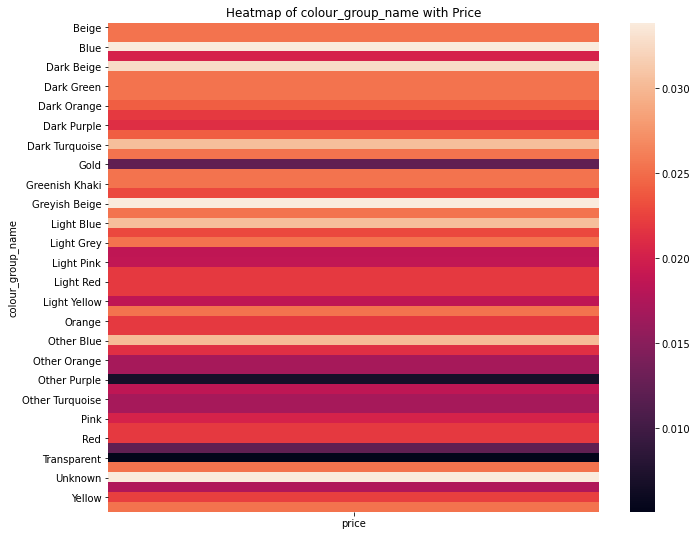

-------------

Variable: perceived_colour_value_name


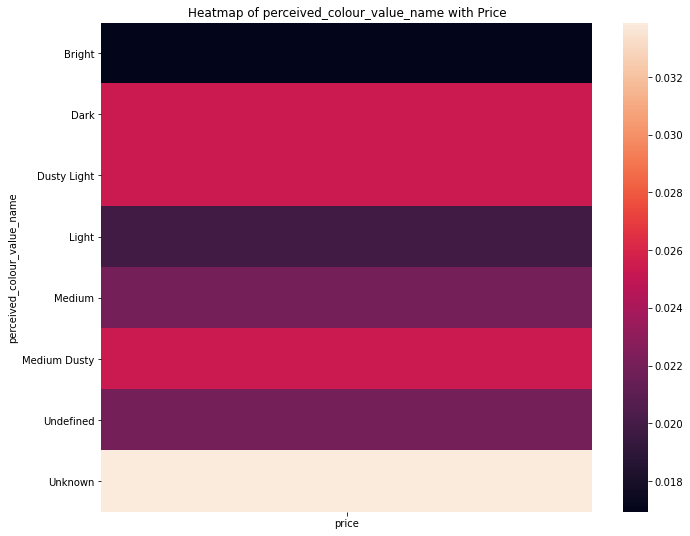

-------------

Variable: perceived_colour_master_name


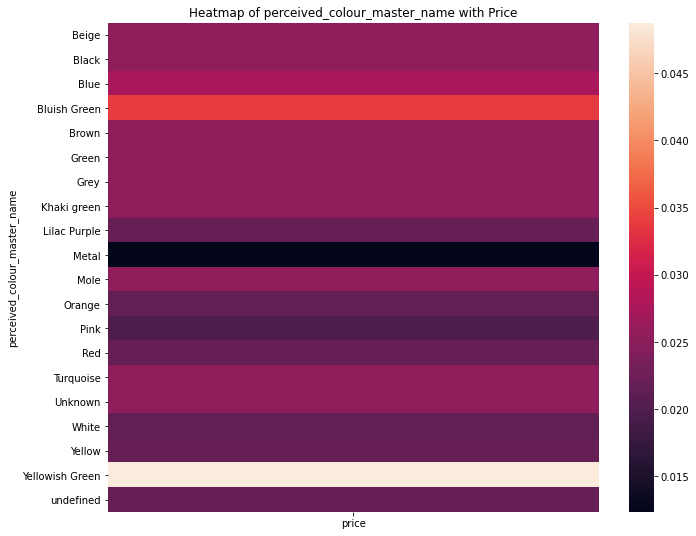

-------------

Variable: department_name


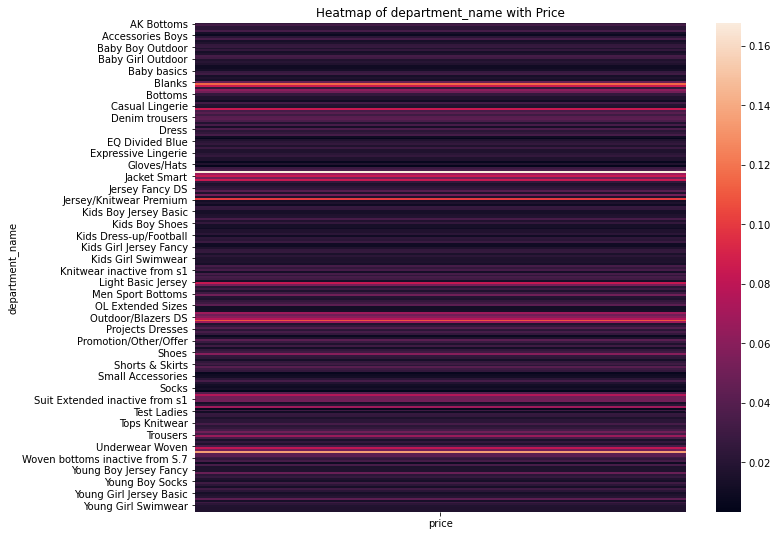

-------------

Variable: index_name


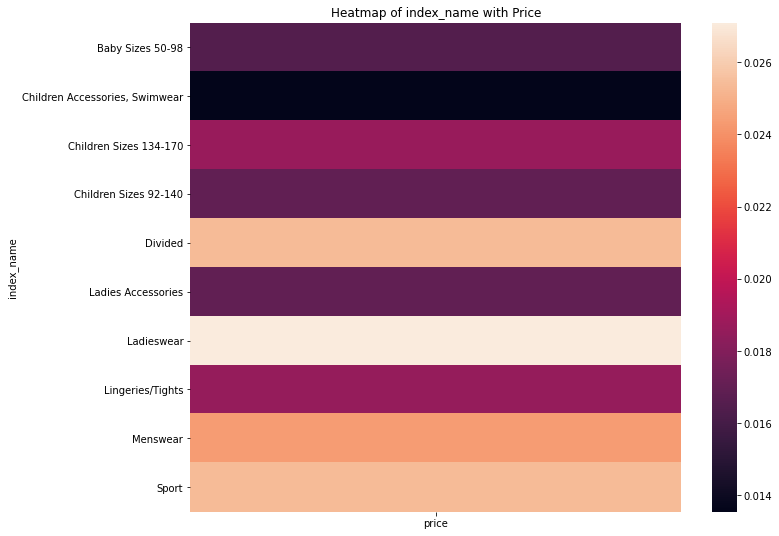

-------------

Variable: index_group_name


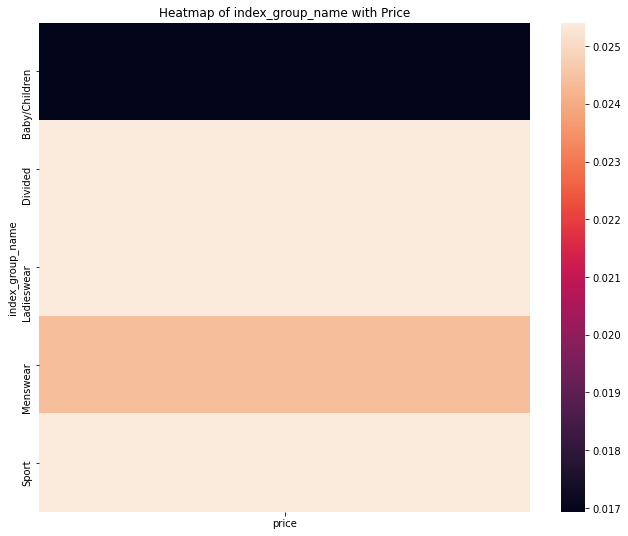

-------------

Variable: section_name


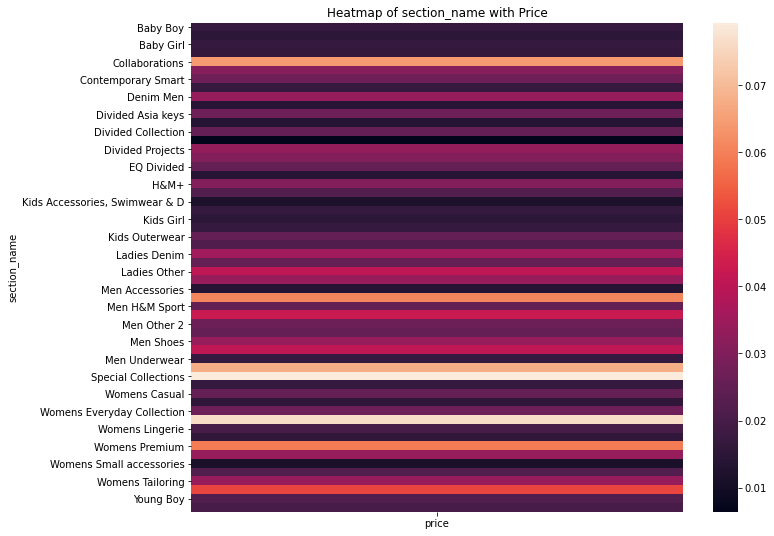

-------------

Variable: garment_group_name


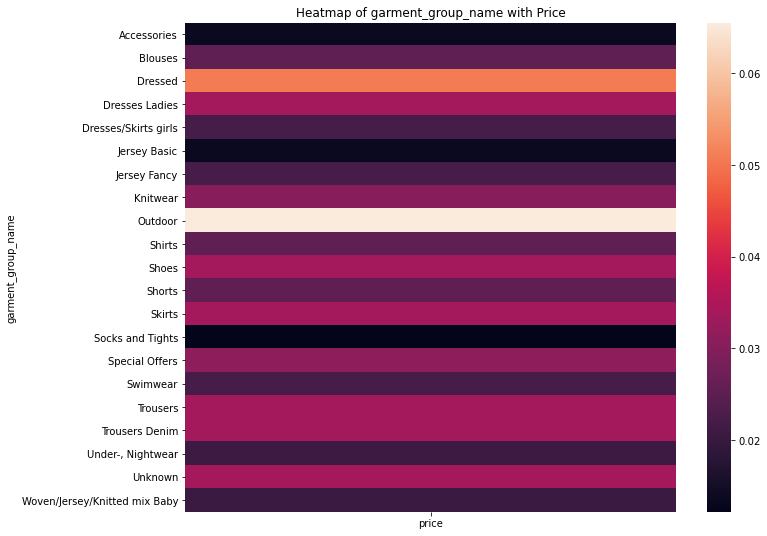

-------------

Variable: club_member_status


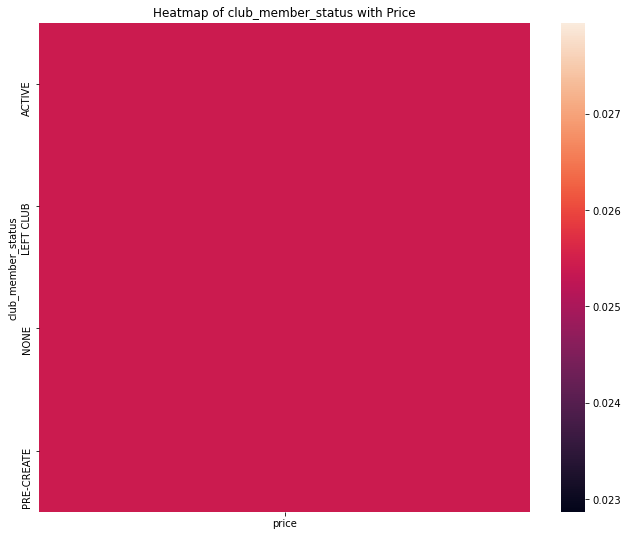

-------------

Variable: fashion_news_frequency


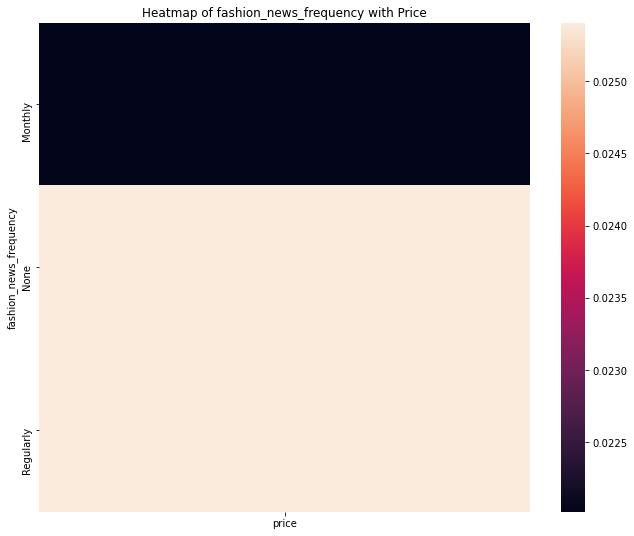

-------------

Variable: postal_code


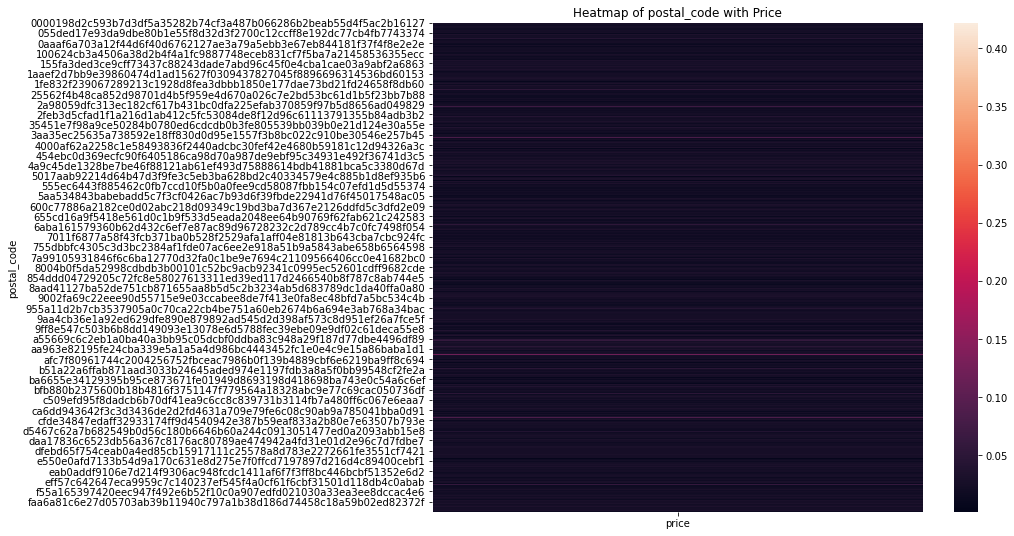

-------------



In [52]:
for var in cat_var:
    print('Variable:',var)
    
    # Subset relevant column with Price
    df_m = df.loc[:,[var,'price']]
    
    # Group by column and use average
    df_m = df_m.groupby([var]).median()
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(df_m)
    plt.title(f'Heatmap of {var} with Price', loc='center')
    plt.show()
    
    print('-------------\n')

### 2.6.3 Relationship of continuous variables with Price (just Age)

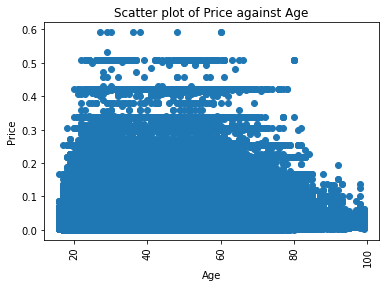

In [53]:
# By actual age
plt.scatter(df['age'], df['price'])
plt.ylabel("Price")
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.title('Scatter plot of Price against Age')
plt.show()

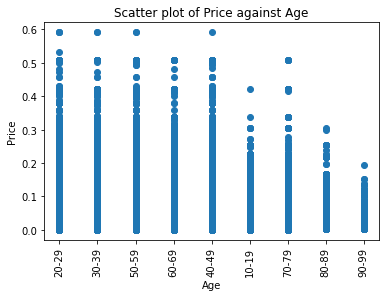

In [54]:
# By age range (in bins)
df_m = df.loc[:,['age','price']]

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['Invalid','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', \
          '70-79', '80-89', '90-99']
df_m['age_range'] = pd.cut(df_m.age,bins,labels = labels,include_lowest = True)

plt.scatter(df_m['age_range'], df_m['price'])
plt.ylabel("Price")
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.title('Scatter plot of Price against Age')
plt.show()

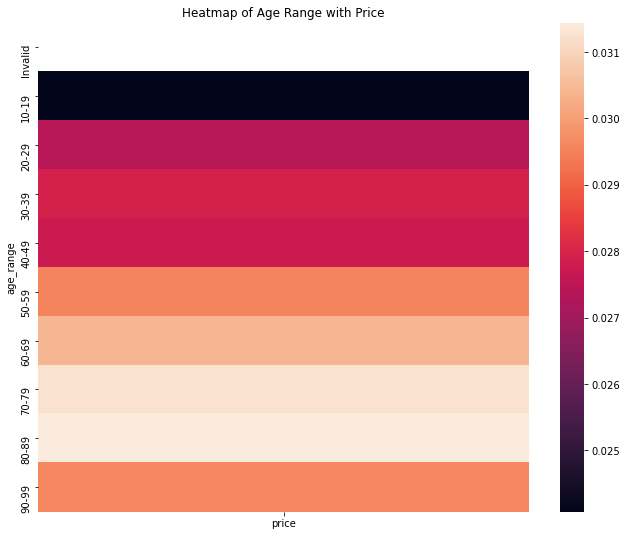

In [55]:
df_m = df_m.drop(columns=['age'])
df_m = df_m.groupby(['age_range']).mean()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Age Range with Price', loc='center')
plt.show()

### 2.6.4 Relationship of date variables with Price (just Transaction Date)

Using Average

In [56]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.loc[:,['t_dat','price']]
df_m['month'] = [i.month for i in df_m['t_dat']]
df_m['year'] = [i.year for i in df_m['t_dat']]

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()
df_m.head()

price
month year          
1     2019  0.026480
      2020  0.026756
2     2019  0.027281
      2020  0.028743
3     2019  0.029186

In [57]:
df_m = df_m.unstack(level=0)
df_m.head()

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2018        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019   0.026480  0.027281  0.029186  0.029009  0.027792  0.025522  0.022347   
2020   0.026756  0.028743  0.028893  0.028197  0.027276  0.024402  0.023945   

                                                         
month        8         9         10        11        12  
year                                                     
2018        NaN  0.029862  0.029775  0.030714  0.028326  
2019   0.024373  0.032847  0.032252  0.032434  0.027960  
2020   0.026783  0.033586       NaN       NaN       NaN

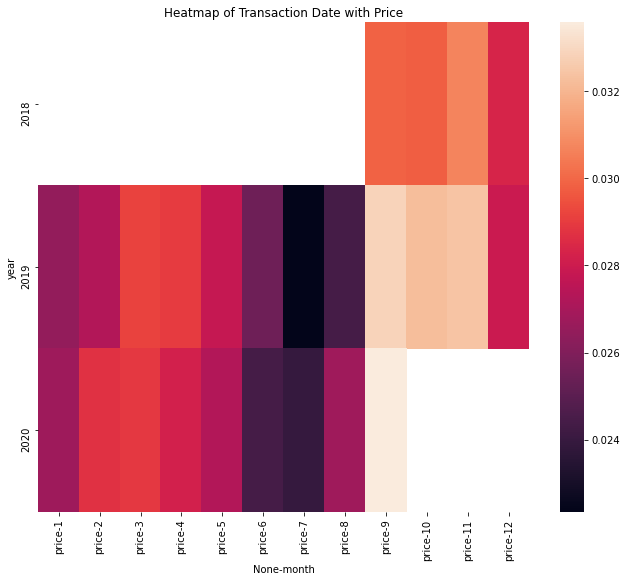

In [58]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Transaction Date with Price', loc='center')
plt.show()

Using Median

In [59]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.loc[:,['t_dat','price']]
df_m['month'] = [i.month for i in df_m['t_dat']]
df_m['year'] = [i.year for i in df_m['t_dat']]

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).median()
df_m.head()

price
month year          
1     2019  0.022017
      2020  0.024186
2     2019  0.025407
      2020  0.025407
3     2019  0.025407

In [60]:
df_m = df_m.unstack(level=0)
df_m.head()

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2018        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019   0.022017  0.025407  0.025407  0.025407  0.025407  0.022864  0.016932   
2020   0.024186  0.025407  0.025407  0.025407  0.025407  0.022017  0.022017   

                                                         
month        8         9         10        11        12  
year                                                     
2018        NaN  0.025407  0.025407  0.025407  0.025407  
2019   0.020322  0.027102  0.027102  0.027102  0.024695  
2020   0.024797  0.031627       NaN       NaN       NaN

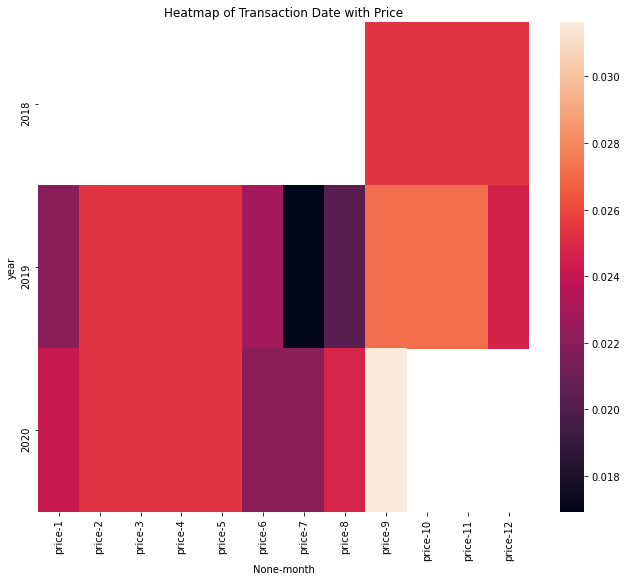

In [61]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.title('Heatmap of Transaction Date with Price', loc='center')
plt.show()